___


# <h1 style="text-align: center;" class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">**Fraud Detection**</h1>
# <h1 style="text-align: center;" class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">*Logistic Regression, Random Forest, Neural Network*</h1>

___

# Fraud Detection Project

Welcome to "***Fraud Detection Project***". 

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, we will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

We will implement ***Logistic Regression, Random Forest, Neural Network*** algorithms and ***SMOTE*** technique. Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***Yellowbrick*** in a variety of ways.

Before diving into the project, please take a look at the Determines and Tasks.

---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, we need to analyze and recognize our data well in order to draw our roadmap and choose the correct arguments we will use. Accordingly, we can examine the frequency distributions of variables. We can observe variable correlations and want to explore multicollinearity. We can show the distribution of the target variable's classes over other variables. 
Also, it is useful to take missing values and outliers.

After these procedures, we can move on to the model building stage by doing the basic data pre-processing are familiar with. 

Start with Logistic Regression and evaluate model performance. We will apply the SMOTE technique used to increase the sample for unbalanced data. Next, rebuild our Logistic Regression model with SMOTE applied data to observe its effect.

Then, we will use three different algorithms in the model building phase. We have applied Logistic Regression and Random Forest in our previous projects. However, the Deep Learning Neural Network algorithm will appear for the first time.


---
---


## The Process

#### 1. Exploratory Data Analysis & Data Cleaning
- Import Modules, Load Data & Data Review
- Exploratory Data Analysis
- Data Cleaning
    
#### 2. Data Preprocessing
- Scaling
- Train - Test Split

#### 3. Model Building
- Logistic Regression without SMOTE
- Apply SMOTE
- Logistic Regression with SMOTE
- Random Forest Classifier with SMOTE
- Neural Network

#### 4. Model Deployement
- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 

---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
!pip install matplotlib==3.4

In [1]:
import tensorflow as tf
import os

# # Note that the `tpu` argument is for Colab-only
# resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

# tf.config.experimental_connect_to_cluster(resolver)
# tf.tpu.experimental.initialize_tpu_system(resolver)
# print("All devices: ", tf.config.list_logical_devices('TPU'))

In [2]:
# strategy = tf.distribute.TPUStrategy(resolver)

In [21]:
# 1-Import Libraies

# import pandas_profiling
# import pyforest

# import ipywidgets
# from ipywidgets import interact

import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mticker
import matplotlib.gridspec as gridspec

# Importing plotly and cufflinks in offline mode
import plotly 
import plotly.express as px
import cufflinks as cf
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff



from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor 
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve 
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold, KFold, cross_val_predict, train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, cross_validate

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, scale, StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PolynomialFeatures, PowerTransformer  
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from yellowbrick.classifier import PrecisionRecallCurve

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}
sns.set_style("whitegrid")

import pickle
# Libraries for Style
# from colorama import Fore, Style
from termcolor import colored, cprint

# sklearn intelex
import numpy as np
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [4]:
df = pd.read_csv("creditcard.csv")


In [5]:
df.shape

(284807, 31)

In [6]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0
5,2.000,-0.426,0.961,1.141,-0.168,0.421,-0.030,0.476,0.260,-0.569,-0.371,1.341,0.360,-0.358,-0.137,0.518,0.402,-0.058,0.069,-0.033,0.085,-0.208,-0.560,-0.026,-0.371,-0.233,0.106,0.254,0.081,3.670,0
6,4.000,1.230,0.141,0.045,1.203,0.192,0.273,-0.005,0.081,0.465,-0.099,-1.417,-0.154,-0.751,0.167,0.050,-0.444,0.003,-0.612,-0.046,-0.220,-0.168,-0.271,-0.154,-0.780,0.750,-0.257,0.035,0.005,4.990,0
7,7.000,-0.644,1.418,1.074,-0.492,0.949,0.428,1.121,-3.808,0.615,1.249,-0.619,0.291,1.758,-1.324,0.686,-0.076,-1.222,-0.358,0.325,-0.157,1.943,-1.015,0.058,-0.650,-0.415,-0.052,-1.207,-1.085,40.800,0
8,7.000,-0.894,0.286,-0.113,-0.272,2.670,3.722,0.370,0.851,-0.392,-0.410,-0.705,-0.110,-0.286,0.074,-0.329,-0.210,-0.500,0.119,0.570,0.053,-0.073,-0.268,-0.204,1.012,0.373,-0.384,0.012,0.142,93.200,0
9,9.000,-0.338,1.120,1.044,-0.222,0.499,-0.247,0.652,0.070,-0.737,-0.367,1.018,0.836,1.007,-0.444,0.150,0.739,-0.541,0.477,0.452,0.204,-0.247,-0.634,-0.121,-0.385,-0.070,0.094,0.246,0.083,3.680,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.000,94813.860,47488.146,0.000,54201.500,84692.000,139320.500,172792.000
V1,284807.000,0.000,1.959,-56.408,-0.920,0.018,1.316,2.455
V2,284807.000,0.000,1.651,-72.716,-0.599,0.065,0.804,22.058
V3,284807.000,-0.000,1.516,-48.326,-0.890,0.180,1.027,9.383
V4,284807.000,0.000,1.416,-5.683,-0.849,-0.020,0.743,16.875
V5,284807.000,-0.000,1.380,-113.743,-0.692,-0.054,0.612,34.802
V6,284807.000,0.000,1.332,-26.161,-0.768,-0.274,0.399,73.302
V7,284807.000,-0.000,1.237,-43.557,-0.554,0.040,0.570,120.589
V8,284807.000,-0.000,1.194,-73.217,-0.209,0.022,0.327,20.007
V9,284807.000,-0.000,1.099,-13.434,-0.643,-0.051,0.597,15.595


In [9]:
df = df[~df.duplicated()]

In [10]:
df.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [11]:
colors = ['gold', 'mediumturquoise']
labels = ['No Fraud','Fraud']
values = df['Class'].value_counts()
fig = go.Figure(data=[go.Pie(labels = labels,
                             values=values,hole=.2)])
fig.update_traces(textfont_size=20, marker=dict(colors=colors, line=dict(color='white', width=0.1)))
fig.update_layout(
    title_text="Credit Card Fraud",
    title_font_color="white",
    legend_title_font_color="yellow",
    paper_bgcolor="black",
    plot_bgcolor='black',
    font_color="white",
    height=400,
    width=600,
)
fig.show()

In [12]:
df[df['Class'] == 0].describe().T.style.background_gradient(subset = ['mean','min','50%', 'max'], cmap = 'RdPu')

,count,mean,std,min,25%,50%,75%,max
Time,283253.000000,94835.058093,47475.550607,0.000000,54233.000000,84711.000000,139308.000000,172792.000000
V1,283253.000000,0.013439,1.922179,-56.407510,-0.913431,0.022562,1.316788,2.454930
V2,283253.000000,-0.009829,1.633520,-72.715728,-0.601398,0.062561,0.797012,18.902453
V3,283253.000000,0.012853,1.457593,-48.325589,-0.883966,0.182247,1.028261,9.382558
V4,283253.000000,-0.010440,1.398575,-5.683171,-0.851605,-0.024500,0.734231,16.875344
V5,283253.000000,0.006769,1.355816,-113.743307,-0.687888,-0.052807,0.612442,34.801666
V6,283253.000000,0.001251,1.329914,-26.160506,-0.767543,-0.274172,0.397678,73.301626
V7,283253.000000,0.010447,1.177480,-31.764946,-0.550146,0.041664,0.571029,120.589494
V8,283253.000000,-0.002448,1.157140,-73.216718,-0.208841,0.021633,0.324473,18.709255
V9,283253.000000,0.002613,1.086902,-6.290730,-0.641649,-0.051368,0.596969,15.594995


In [13]:
df[df['Class'] == 1].describe().T.style.background_gradient(subset = ['mean','min','50%', 'max'], cmap = 'RdPu')

,count,mean,std,min,25%,50%,75%,max
Time,473.000000,80450.513742,48636.179973,406.000000,41203.000000,73408.000000,129095.000000,170348.000000
V1,473.000000,-4.498280,6.593145,-30.552380,-5.603690,-2.271755,-0.361428,2.132386
V2,473.000000,3.405965,4.122500,-8.402154,1.145381,2.617105,4.571743,22.057729
V3,473.000000,-6.729599,6.909647,-31.103685,-7.926507,-4.875397,-2.171454,2.250210
V4,473.000000,4.472591,2.871523,-1.313275,2.288644,4.100098,6.290918,12.114672
V5,473.000000,-2.957197,5.278831,-22.105532,-4.278983,-1.372245,0.260821,11.095089
V6,473.000000,-1.432518,1.715347,-6.406267,-2.450444,-1.420468,-0.413647,6.474115
V7,473.000000,-5.175912,6.858024,-43.557242,-6.989195,-2.902079,-0.907188,5.802537
V8,473.000000,0.953255,5.585950,-41.044261,-0.161518,0.617738,1.709417,20.007208
V9,473.000000,-2.522124,2.465047,-13.434066,-3.796760,-2.099049,-0.788388,3.353525


In [14]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94835.058,0.013,-0.010,0.013,-0.010,0.007,0.001,0.010,-0.002,0.003,0.008,-0.006,0.009,0.001,0.012,0.001,0.008,0.011,0.005,-0.001,-0.000,-0.001,-0.000,0.000,0.000,-0.000,0.000,0.001,0.000,88.414
1,80450.514,-4.498,3.406,-6.730,4.473,-2.957,-1.433,-5.176,0.953,-2.522,-5.453,3.716,-6.103,-0.094,-6.836,-0.073,-4.001,-6.463,-2.157,0.669,0.405,0.467,0.087,-0.096,-0.107,0.041,0.050,0.214,0.078,123.872


In [15]:
df_temp = df.corr()  
feature =[]
collinear=[]
for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i]> .9 and df_temp[col][i] < 1) or (df_temp[col][i]< -.9 and df_temp[col][i] > -1) :
                feature.append(col)
                collinear.append(i)
                # print(f"multicolinearity alert in between {col} - {i}")


In [16]:
my_dict = {"feature":feature, "collinear":collinear} # oluşan listeyi değişken ve ilişkisi olan değişkeni yazdırabilmek için
df_col = pd.DataFrame(my_dict)
df_col

,feature,collinear


In [17]:
corr = df.corr() 
corr.style.background_gradient(cmap='RdBu_r').set_precision(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.00,0.12,-0.01,-0.42,-0.11,0.17,-0.06,0.09,-0.04,-0.01,0.03,-0.25,0.13,-0.07,-0.10,-0.18,0.01,-0.07,0.09,0.03,-0.05,0.05,0.14,0.05,-0.02,-0.23,-0.04,-0.01,-0.01,-0.01,-0.01
V1,0.12,1.00,0.01,-0.01,0.00,-0.01,0.00,-0.01,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.02,-0.00,-0.23,-0.09
V2,-0.01,0.01,1.00,0.01,-0.00,0.01,-0.00,0.01,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.01,0.00,-0.53,0.08
V3,-0.42,-0.01,0.01,1.00,0.00,-0.01,-0.00,-0.01,-0.00,-0.00,-0.01,0.00,-0.01,0.00,-0.00,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.01,-0.00,-0.21,-0.18
V4,-0.11,0.00,-0.00,0.00,1.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.10,0.13
V5,0.17,-0.01,0.01,-0.01,0.00,1.00,-0.00,-0.01,0.00,-0.00,-0.01,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.01,-0.00,-0.39,-0.09
V6,-0.06,0.00,-0.00,-0.00,-0.00,-0.00,1.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.22,-0.04
V7,0.09,-0.01,0.01,-0.01,0.00,-0.01,0.00,1.00,-0.01,-0.00,-0.01,0.00,-0.01,-0.00,-0.00,-0.00,-0.01,-0.01,-0.00,0.00,-0.00,0.01,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.40,-0.17
V8,-0.04,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.01,1.00,0.00,0.00,0.00,-0.00,-0.00,-0.01,0.00,-0.00,-0.01,-0.00,-0.00,0.00,0.02,-0.01,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.10,0.03
V9,-0.01,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,1.00,-0.01,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.01,0.01,-0.04,-0.09


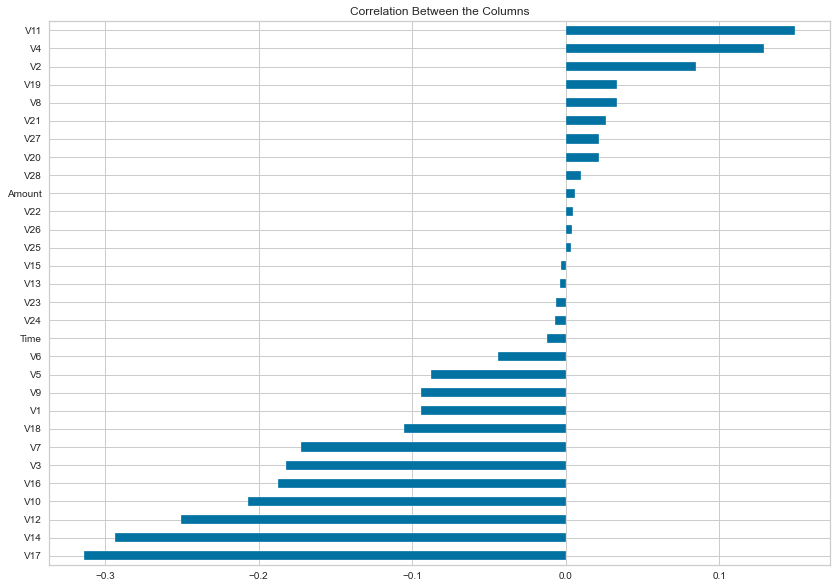

In [18]:
plt.figure(figsize=(14,10))
df.corr()['Class'].sort_values().drop('Class').plot(kind = 'barh', title = 'Correlation Between the Columns');


In [19]:
pip install chart_studio


Note: you may need to restart the kernel to use updated packages.


### Exploratory Data Analysis

### Data Cleaning
Check Missing Values and Outliers

In [23]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [24]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [25]:
lst= df.columns

In [26]:
def outlier_report(df, cols, whisker=3):
    res = {}
    for col in cols:
        iqr = np.quantile(df[col],[.25,.75])[1] - np.quantile(df[col],[.25,.75])[0]
        lower_limit = np.quantile(df[col],[.25,.75])[0]- iqr*whisker 
        upper_limit = np.quantile(df[col],[.25,.75])[1]+iqr*whisker
        num = len([c for c in df[col].to_list() if (c<lower_limit or c>upper_limit)])
        if num > 0:res[col]={"lower_limit":lower_limit, "upper_limit":upper_limit, "iqr": iqr, "# of outliers":num}
    return pd.DataFrame(res).T
res = outlier_report(df, lst)

In [27]:
res

,lower_limit,upper_limit,iqr,# of outliers
V1,-7.612,8.012,2.232,1949.000
V2,-4.802,5.002,1.401,4430.000
V3,-6.640,6.777,1.917,738.000
V4,-5.619,5.509,1.590,469.000
V5,-4.596,4.518,1.302,2280.000
V6,-4.266,3.894,1.166,5415.000
V7,-3.921,3.939,1.123,3006.000
V8,-1.812,1.929,0.535,11163.000
V9,-4.365,4.317,1.240,1040.000
V10,-3.503,3.421,0.989,3095.000


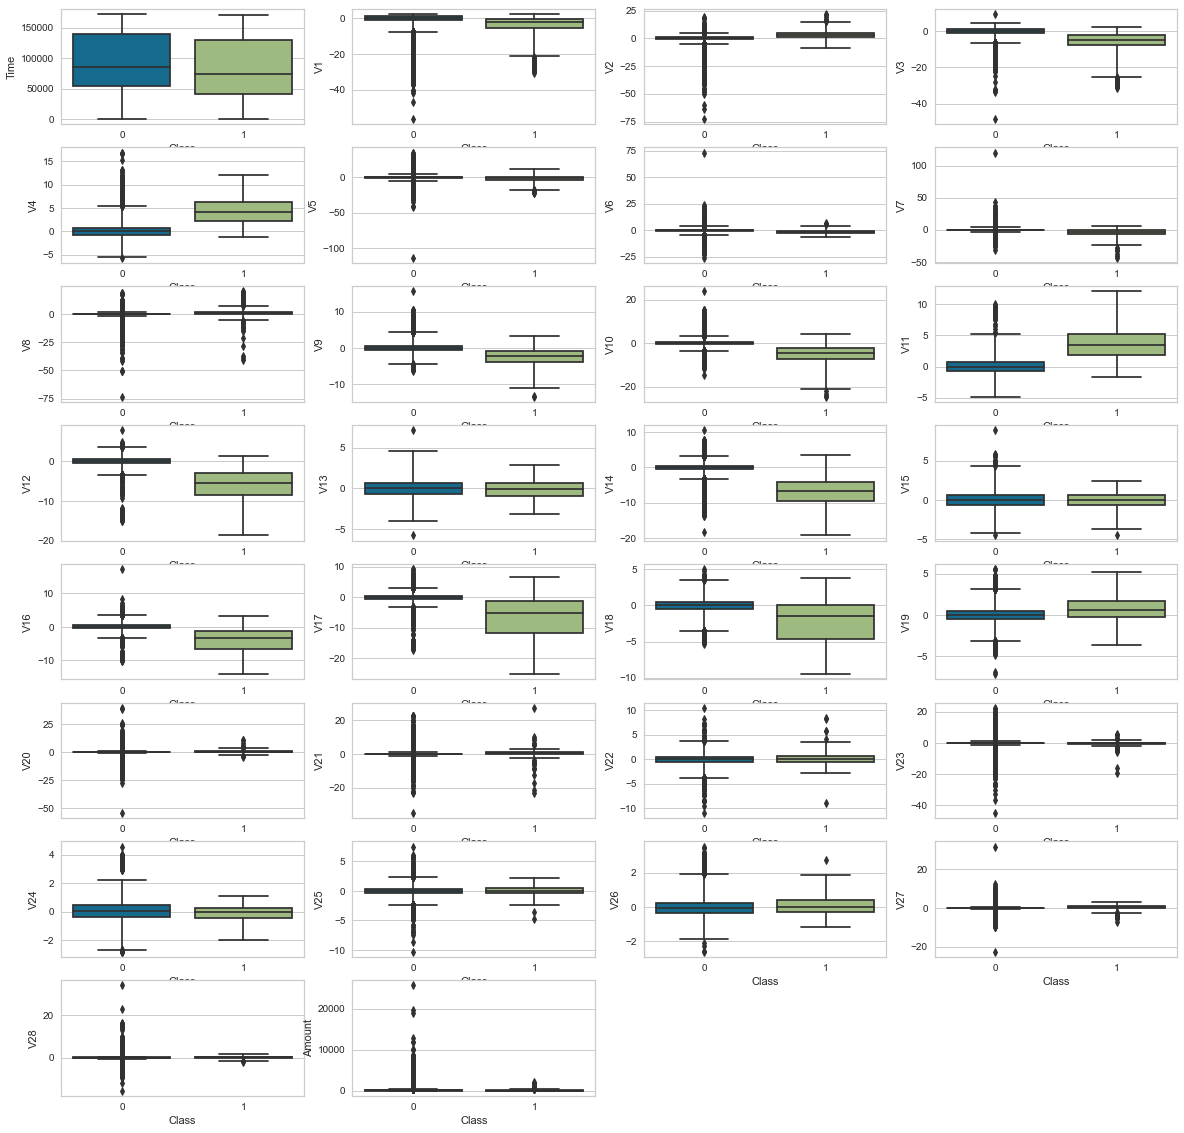

In [28]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns[:30]:
    index += 1
    plt.subplot(8,4,index)
    sns.boxplot(y = feature, x = "Class", data = df, whis=3)

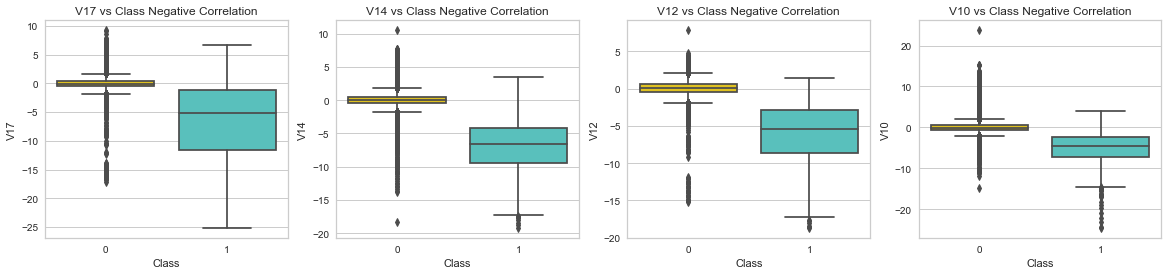

In [29]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

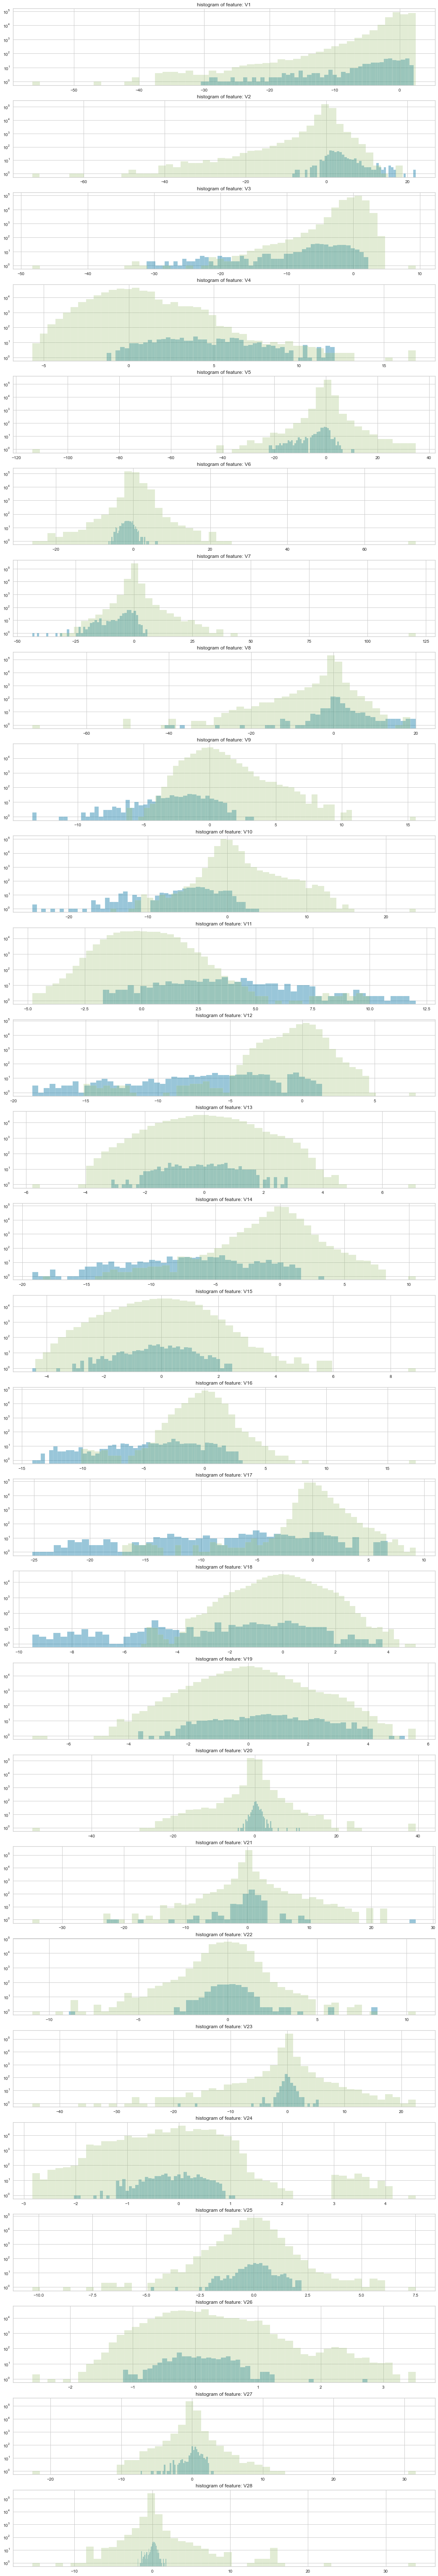

In [22]:
plt.figure(figsize=(18,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df.drop(['Time', 'Class', 'Amount'], axis=1)):
    ax = plt.subplot(gs[i])
    plt.hist(df[cn][df.Class == 1], bins=50, alpha = 0.4)
    plt.hist(df[cn][df.Class == 0], bins=50, alpha = 0.3)
    plt.yscale('log')
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

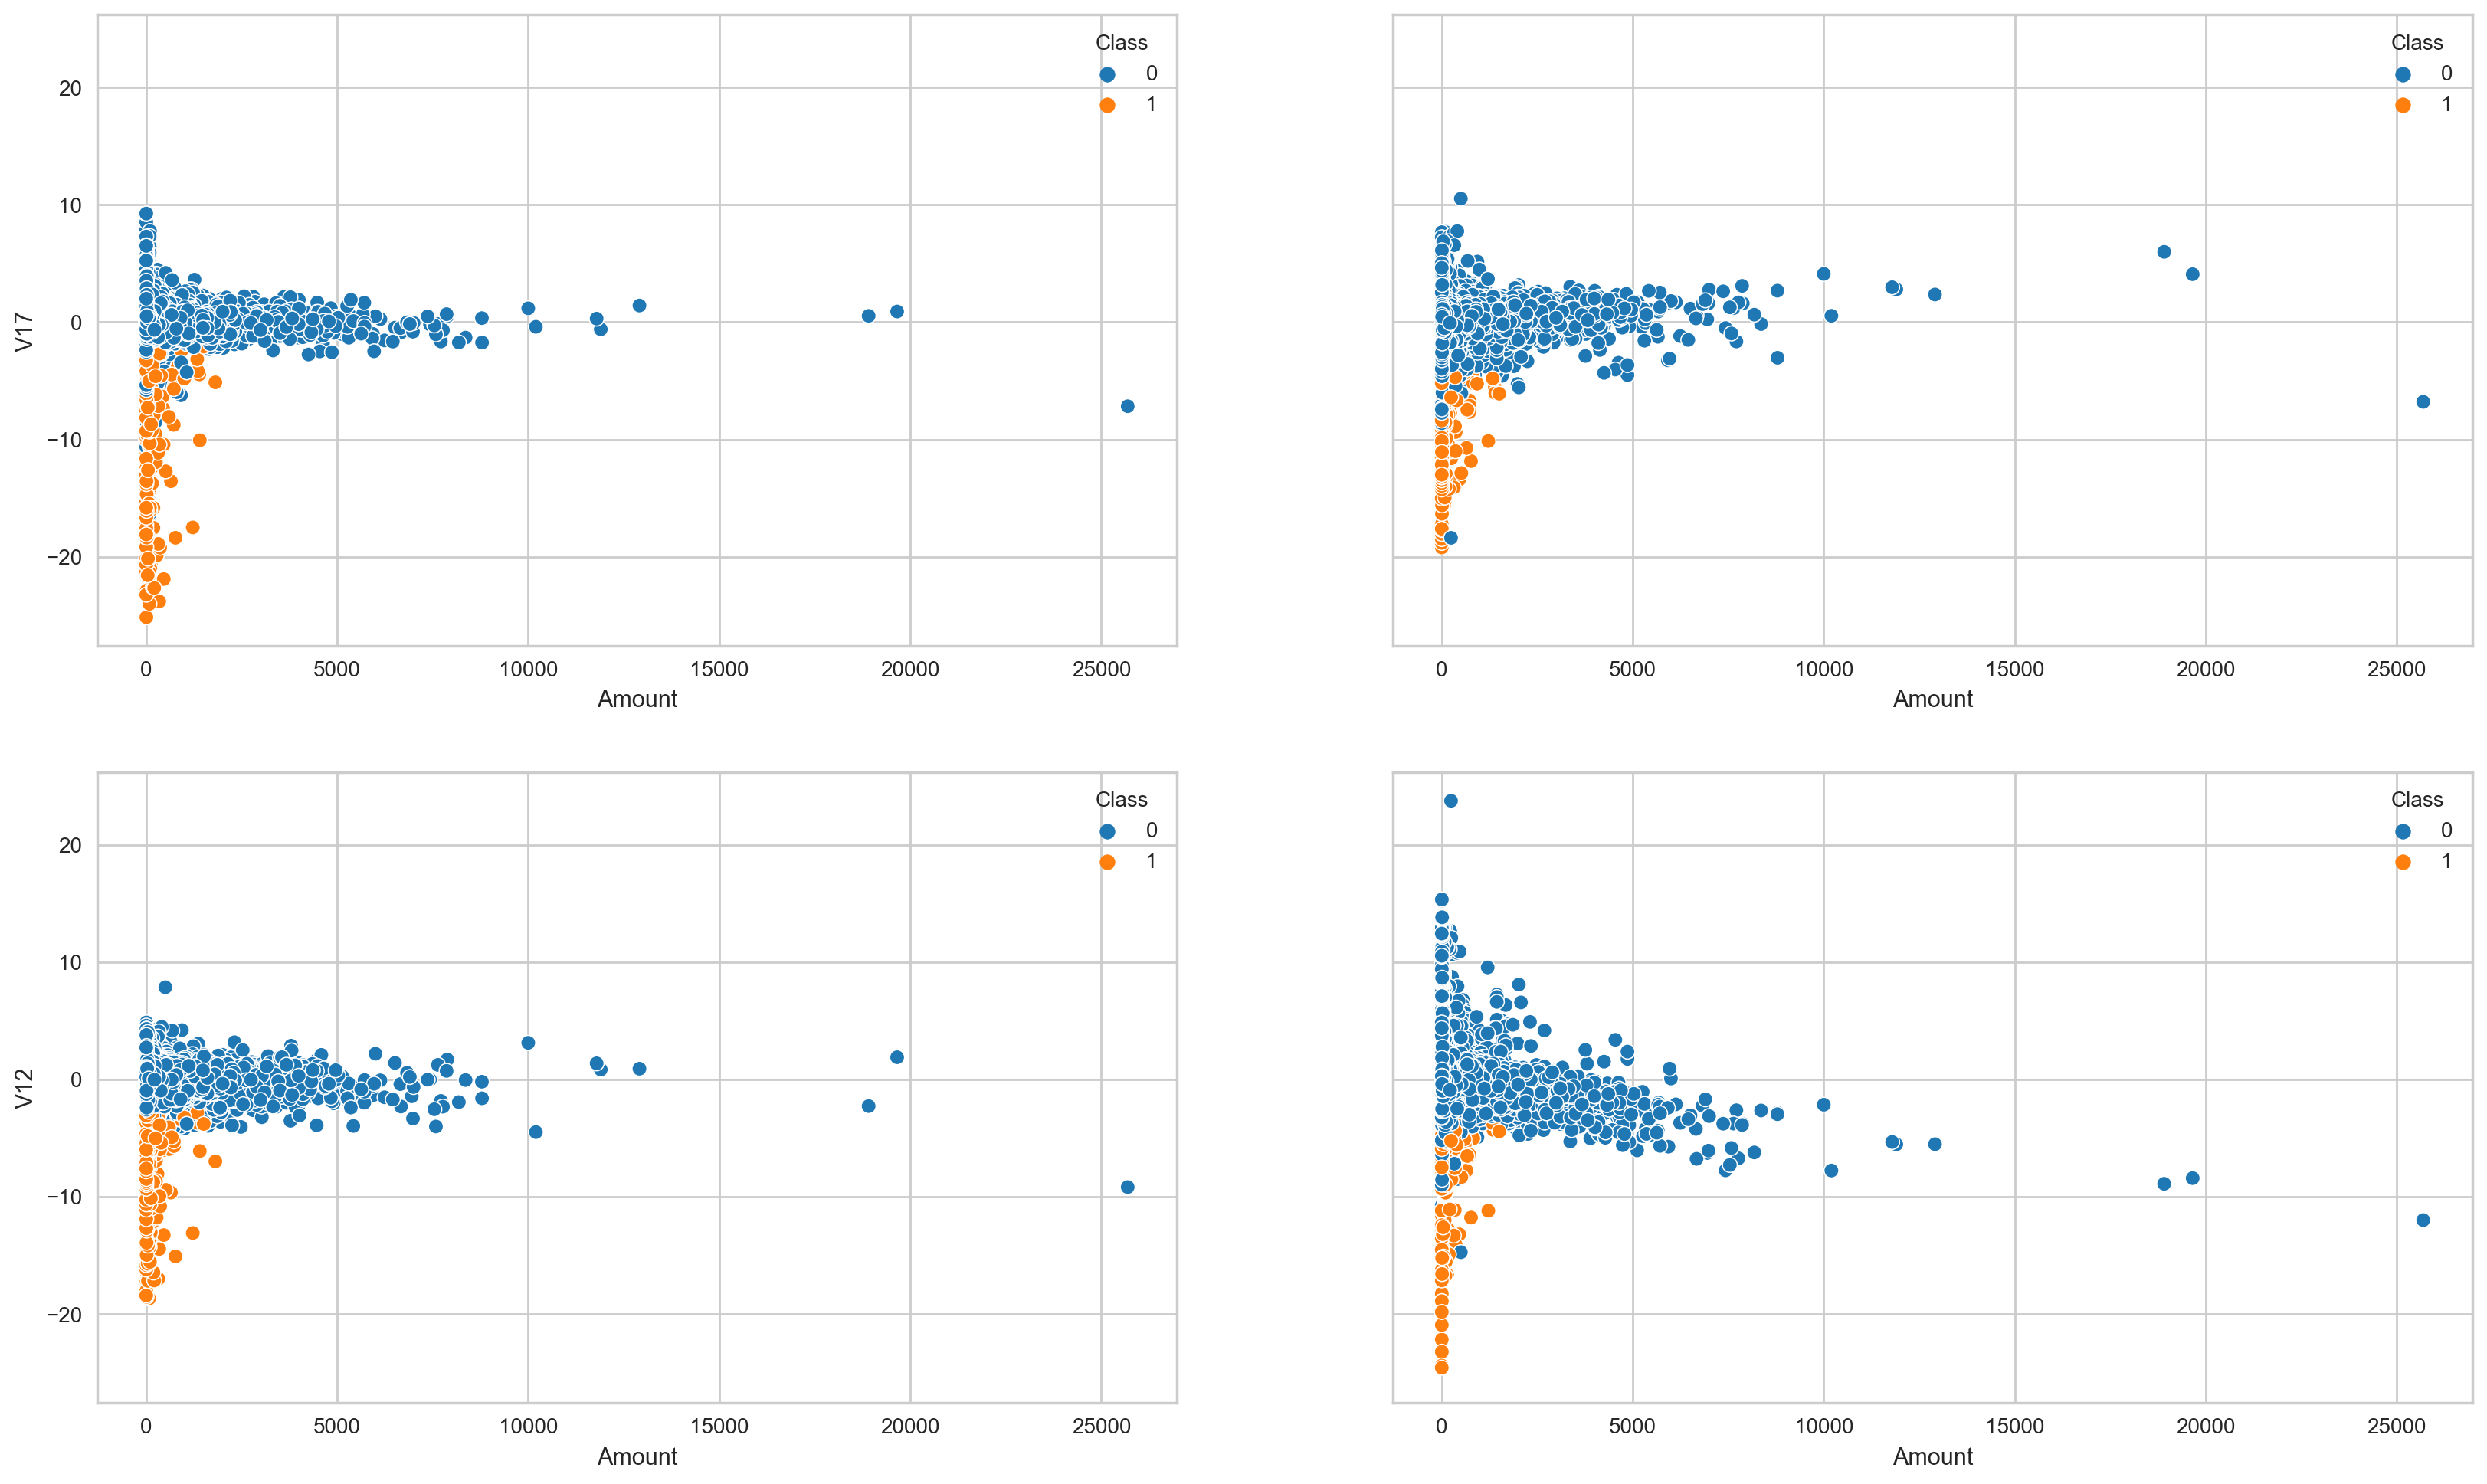

In [30]:
f, ax = plt.subplots(2,2, figsize=(20,12), dpi=200, sharey=True)
sns.scatterplot(data = df, x ='Amount', y = 'V17', hue = 'Class',  ax=ax[0,0], palette='tab10')
sns.scatterplot(data = df, x ='Amount', y = 'V14', hue =  'Class', ax=ax[0,1], palette='tab10')
sns.scatterplot(data = df, x ='Amount', y = 'V12', hue = 'Class',  ax=ax[1,0], palette='tab10')
sns.scatterplot(data = df, x ='Amount', y = 'V10', hue = 'Class',  ax=ax[1,1], palette='tab10');

<AxesSubplot:xlabel='Time'>

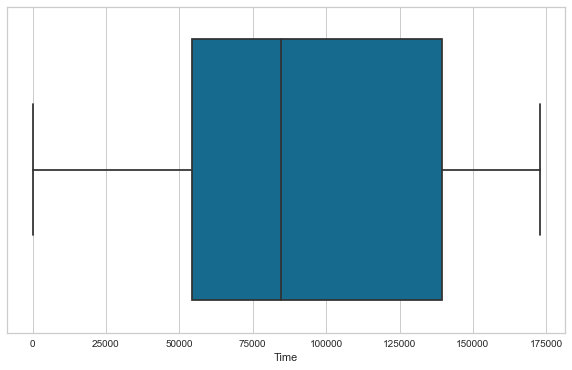

In [31]:
sns.boxplot(df.Time)

In [32]:
timedelta = pd.to_timedelta(df['Time'], unit='s')
df['Hour'] = (timedelta.dt.components.hours).astype(int)

In [33]:
# create a list of our conditions
conditions = [
    (df.index < 144786),
    (df.index>= 144786)
    ]

# create a list of the values we want to assign for each condition
values = ['Day1', 'Day2']

# create a new column and use np.select to assign values to it using our lists as arguments
df['Day'] = np.select(conditions, values)

In [34]:
# First we limit the dataframe to where a fraudulent activity was identify
df_fraud = df[df['Class'] == 1]

# group by Hour, then count of fradulent transaction
d1 = df_fraud[['Class','Hour']]

d1 = d1.groupby(['Hour']).count()
d1.reset_index(level=0, inplace=True)

# group by Hour, then average Amount of fradulent transaction
d2 = df_fraud[['Amount','Hour']]
d2 = d2.groupby(['Hour']).mean()
d2.reset_index(level=0, inplace=True)

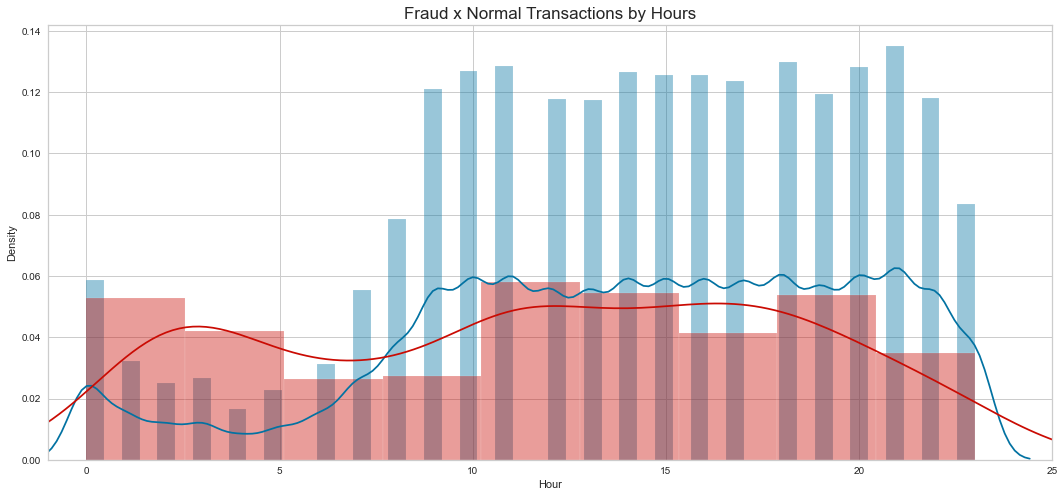

In [35]:
#Exploring the distribuition by Class types throught hours 
plt.figure(figsize=(18,8))
ax=sns.distplot(df[df['Class'] == 0]["Hour"], 
             color='b')

sns.distplot(df[df['Class'] == 1]["Hour"], 
             color='r')
plt.title('Fraud x Normal Transactions by Hours', fontsize=17)
plt.xlim([-1,25])
plt.show()

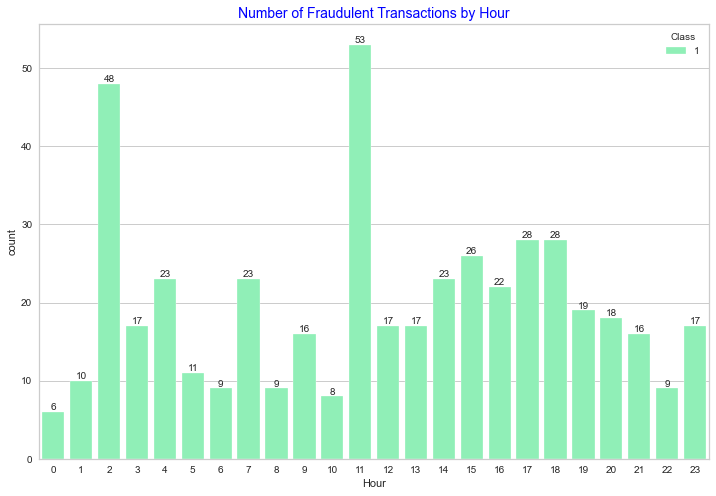

In [36]:
plt.figure(figsize=(12, 8))

plt.title("Number of Fraudulent Transactions by Hour", c="blue", size=14)
ax1 = sns.countplot(x="Hour", hue="Class", data=df_fraud, palette = 'rainbow')
ax1.bar_label(ax1.containers[0], label_type="edge")
plt.show()

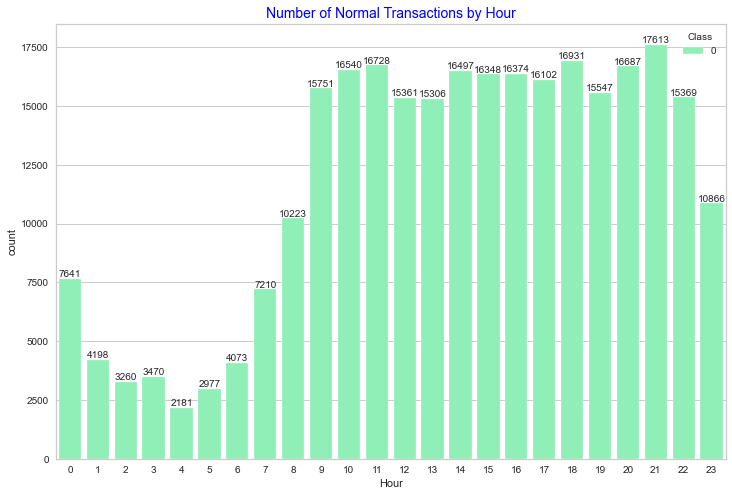

In [37]:
plt.figure(figsize=(12, 8))

plt.title("Number of Normal Transactions by Hour", c="blue", size=14)
ax1 = sns.countplot(x="Hour", hue="Class", data=df[df.Class==0], palette = 'rainbow')
ax1.bar_label(ax1.containers[0], label_type="edge")
plt.show()

In [39]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0].sample(473)

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour,Day
234705,148074.000,-2.219,0.728,-5.458,5.925,3.932,-3.086,-1.678,0.865,-3.177,-3.419,3.693,-3.978,-1.719,-8.636,-0.243,1.175,2.135,2.594,-1.258,0.965,0.417,-0.817,-0.029,0.026,-0.826,-0.013,0.413,-0.131,0.000,1,17,Day2
8842,12093.000,-4.697,2.694,-4.475,5.468,-1.557,-1.549,-4.104,0.554,-1.498,-4.595,5.276,-11.349,0.375,-8.139,0.549,-6.654,-10.247,-4.191,0.991,-0.159,0.574,-0.080,0.318,-0.246,0.338,0.032,-1.508,0.608,0.000,1,3,Day1
246726,153301.000,2.039,0.105,-1.842,0.215,0.700,-0.320,0.127,-0.100,0.173,-0.230,0.887,1.013,0.619,-0.782,-0.529,0.599,0.052,0.244,0.479,-0.075,-0.325,-0.861,0.264,0.116,-0.222,0.175,-0.065,-0.041,12.260,0,18,Day2
122479,76575.000,-5.622,3.481,-6.201,4.311,-5.226,-1.342,-5.221,2.683,-2.921,-6.561,3.211,-6.862,0.326,-7.755,0.505,-6.277,-10.612,-4.147,2.197,-0.156,0.950,-0.429,-0.351,0.198,0.159,-0.378,-0.214,0.460,219.800,1,21,Day1
213092,139107.000,-4.667,-3.952,0.206,5.154,5.229,0.939,-0.635,-0.705,-0.235,4.031,0.984,-0.579,-0.200,-0.730,1.267,-0.843,-0.103,-0.598,1.060,-2.286,-0.664,1.821,0.114,-0.760,-0.502,0.631,-0.514,0.730,22.470,1,14,Day2


Total number of transactions in the AFTERNOON : 97702
Total number of transactions in the EVENING : 76161
Total number of transactions in the MORNING : 81939
Total number of transactions in the NIGHT : 27924


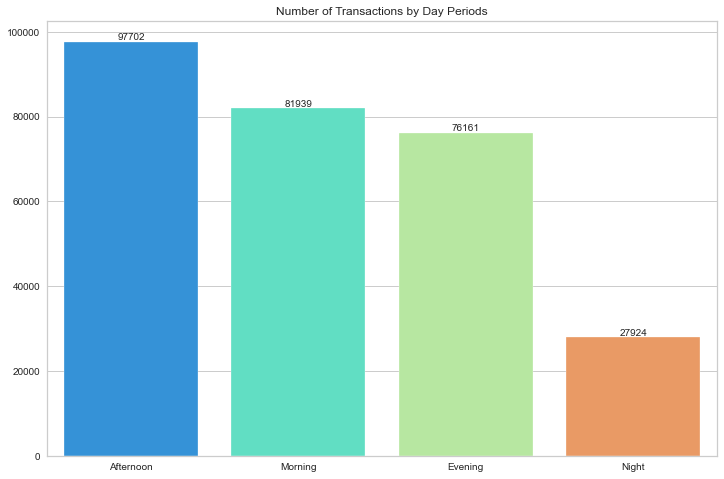

In [40]:
def time_period(x):
    
    """This function classifies periods in a day!!!"""
    
    if x <= 6:
        return "Night"
    elif x <= 12:
        return "Morning"
    elif x <= 18:
        return "Afternoon"
    else:
        return "Evening"
    
df["Hour_Class"] = df["Hour"].apply(time_period)

for i in df.groupby("Hour_Class")["Class"].count().index:
    print("Total number of transactions in the", i.upper(),":", df.groupby("Hour_Class")["Class"].count().loc[i])

plt.figure(figsize=(12,8))
plt.title("Number of Transactions by Day Periods")
ax = sns.barplot(x=df["Hour_Class"].value_counts().index, y=df["Hour_Class"].value_counts().values, palette="rainbow")
ax.bar_label(ax.containers[0])
plt.show()

In [41]:
df.groupby(["Day", "Hour_Class"]).Amount.mean()

Day   Hour_Class
Day1  Afternoon    100.048
      Evening       74.124
      Morning      105.501
      Night         64.058
Day2  Afternoon     94.626
      Evening       71.515
      Morning       97.487
      Night         59.694
Name: Amount, dtype: float64

In [42]:
df_fraud = df[df['Class'] == 1]
df_fraud.sample()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour,Day,Hour_Class
43061,41353.000,-15.021,8.075,-16.298,5.665,-11.918,-4.247,-14.717,9.435,-6.795,-15.124,6.038,-11.677,1.327,-12.382,-0.072,-9.484,-19.672,-7.643,1.169,-0.996,2.525,-0.832,-0.186,0.430,0.697,0.056,-1.311,-0.707,34.120,1,11,Day1,Morning


In [43]:
colors = ['gold', 'mediumturquoise']
labels = ['Day1','Day2']
values = df['Day'].value_counts()
fig = go.Figure(data=[go.Pie(labels = labels,
                             values=values,hole=.2)])
fig.update_traces(textfont_size=20, marker=dict(colors=colors, line=dict(color='white', width=0.1)))
fig.update_layout(
    title_text="Number of Transactions by Day",
    title_font_color="white",
    legend_title_font_color="yellow",
    paper_bgcolor="black",
    plot_bgcolor='black',
    font_color="white",
    height=400,
    width=600,
)
fig.show()

In [44]:
colors = ['gold', 'mediumturquoise']
labels = ['Day1','Day2']
values = df_fraud['Day'].value_counts()
fig = go.Figure(data=[go.Pie(labels = labels,
                             values=values,hole=.2)])
fig.update_traces(textfont_size=20, marker=dict(colors=colors, line=dict(color='white', width=0.1)))
fig.update_layout(
    title_text="Number of Fraudible Transactions by Day",
    title_font_color="white",
    legend_title_font_color="yellow",
    paper_bgcolor="black",
    plot_bgcolor='black',
    font_color="white",
    height=400,
    width=600,
)
fig.show()

In [45]:
df_fraud.groupby(["Day", "Hour_Class"]).Amount.mean()

Day   Hour_Class
Day1  Afternoon    164.701
      Evening      126.071
      Morning      100.499
      Night         89.462
Day2  Afternoon    144.843
      Evening       82.391
      Morning      242.159
      Night         88.937
Name: Amount, dtype: float64

In [46]:
df_fraud.groupby(["Day", "Hour_Class"]).Amount.count().sort_values()

Day   Hour_Class
Day2  Morning       29
      Evening       34
Day1  Evening       45
      Night         58
Day2  Night         66
Day1  Afternoon     72
Day2  Afternoon     72
Day1  Morning       97
Name: Amount, dtype: int64

In [47]:
df.groupby(["Day", "Hour_Class"]).Amount.count().sort_values()

Day   Hour_Class
Day2  Night         13806
Day1  Night         14118
Day2  Evening       34397
Day1  Morning       40778
Day2  Morning       41161
Day1  Evening       41764
      Afternoon     47576
Day2  Afternoon     50126
Name: Amount, dtype: int64

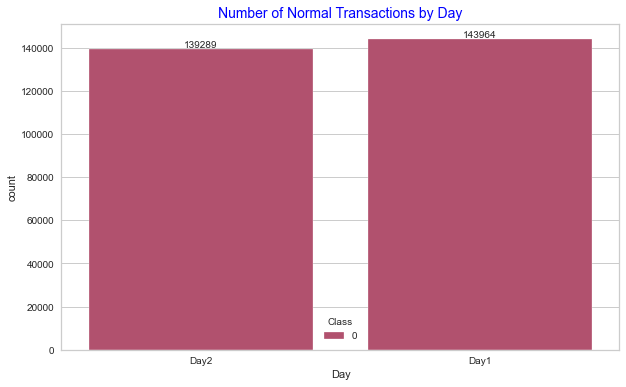

In [48]:
plt.figure(figsize=(10, 6))

plt.title("Number of Normal Transactions by Day", c="blue", size=14)
ax1 = sns.countplot(x="Day", hue="Class", data=df[df.Class==0], palette = 'flare')
ax1.bar_label(ax1.containers[0], label_type="edge")
plt.show()

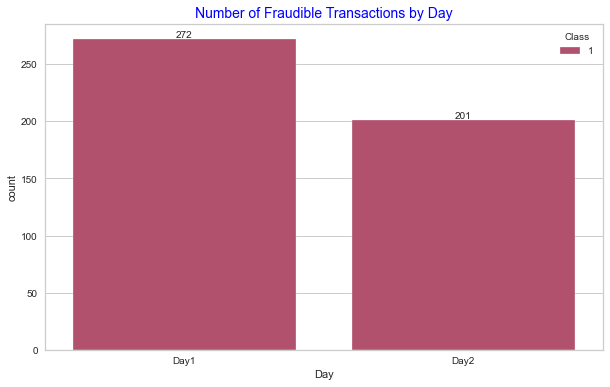

In [49]:
plt.figure(figsize=(10, 6))

plt.title("Number of Fraudible Transactions by Day", c="blue", size=14)
ax1 = sns.countplot(x="Day", hue="Class", data=df[df.Class==1], palette = 'flare')
ax1.bar_label(ax1.containers[0], label_type="edge")
plt.show()

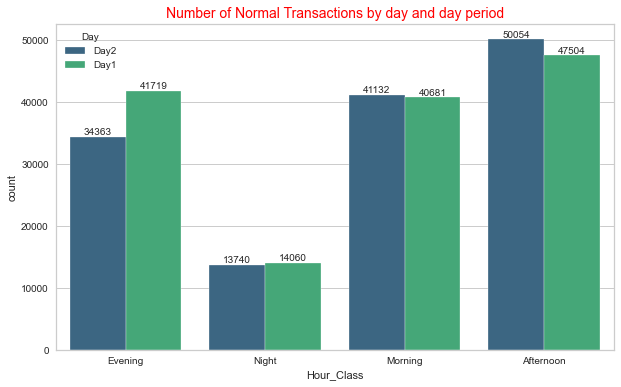

In [50]:
plt.figure(figsize=(10, 6))

plt.title("Number of Normal Transactions by day and day period", c="red", size=14)
ax1 = sns.countplot(x="Hour_Class", hue="Day", data=df[df.Class==0], palette = 'viridis')
ax1.bar_label(ax1.containers[0], label_type="edge")
ax1.bar_label(ax1.containers[1], label_type="edge")
plt.show()

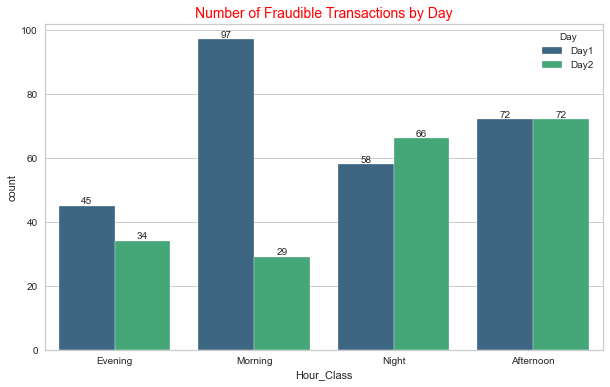

In [51]:
plt.figure(figsize=(10, 6))

plt.title("Number of Fraudible Transactions by Day", c="red", size=14)
ax1 = sns.countplot(x="Hour_Class", hue="Day", data=df[df.Class==1], palette = 'viridis')
ax1.bar_label(ax1.containers[0], label_type="edge")
ax1.bar_label(ax1.containers[1], label_type="edge")
plt.show()

## Dealing with Amount Feature

Average amount of transactions in the AFTERNOON : 97.26636373871568
Average amount of transactions in the EVENING : 72.94546789039009
Average amount of transactions in the MORNING : 101.47511038699521
Average amount of transactions in the NIGHT : 61.90067898581865


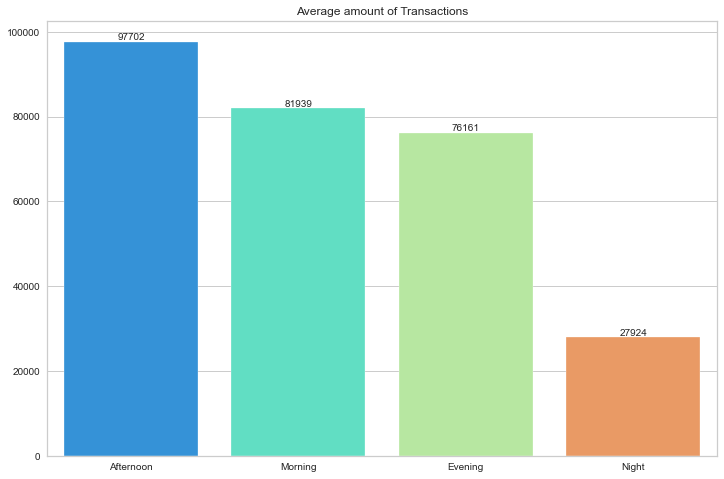

In [52]:
for i in df.groupby("Hour_Class")["Amount"].mean().index:
    print("Average amount of transactions in the", i.upper(),":", df.groupby("Hour_Class")["Amount"].mean().loc[i])

plt.figure(figsize=(12,8))
plt.title("Average amount of Transactions")
ax = sns.barplot(x=df["Hour_Class"].value_counts().index, y=df["Hour_Class"].value_counts().values, palette="rainbow")
ax.bar_label(ax.containers[0])
plt.show()

In [53]:
df_fraud.sample()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour,Day,Hour_Class
541,406.000,-2.312,1.952,-1.610,3.998,-0.522,-1.427,-2.537,1.392,-2.770,-2.772,3.202,-2.900,-0.595,-4.289,0.390,-1.141,-2.830,-0.017,0.417,0.127,0.517,-0.035,-0.465,0.320,0.045,0.178,0.261,-0.143,0.000,1,0,Day1,Night


Total number of fraudulent transactions in the : Hour_Class  Day 
Afternoon   Day1   164.701
            Day2   144.843
Evening     Day1   126.071
            Day2    82.391
Morning     Day1   100.499
            Day2   242.159
Night       Day1    89.462
            Day2    88.937
Name: Amount, dtype: float64


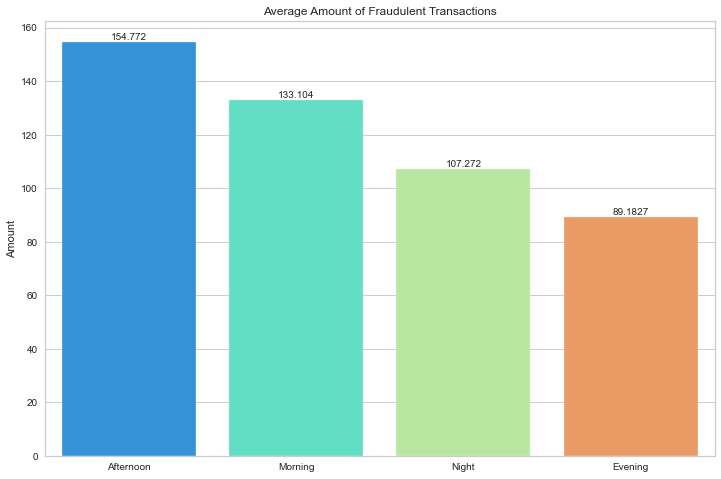

In [54]:
print("Total number of fraudulent transactions in the",":", df_fraud.groupby(["Hour_Class", "Day"])["Amount"].mean())

plt.figure(figsize=(12,8))
plt.title("Average Amount of Fraudulent Transactions")
ax = sns.barplot(x=df_fraud["Hour_Class"].value_counts().index, y=df_fraud.groupby("Hour_Class")["Amount"].mean().sort_values(ascending=False), data=df_fraud, palette="rainbow")
ax.bar_label(ax.containers[0])
plt.show()

Total number of fraudulent transactions in the AFTERNOON : 144
Total number of fraudulent transactions in the EVENING : 79
Total number of fraudulent transactions in the MORNING : 126
Total number of fraudulent transactions in the NIGHT : 124


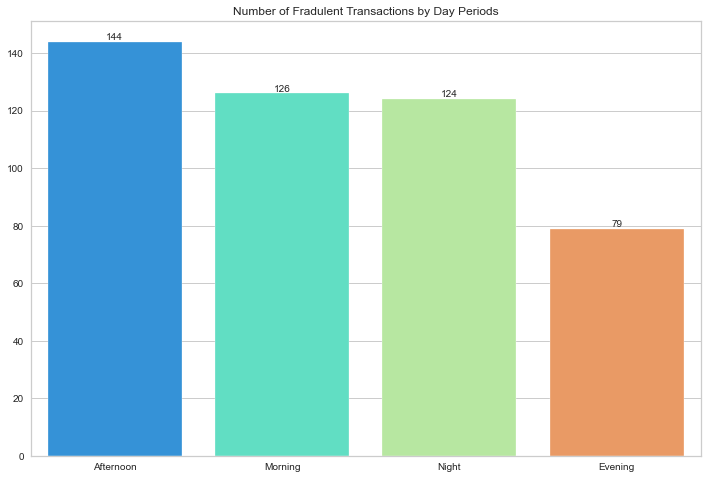

In [55]:
for i in df_fraud.groupby("Hour_Class")["Class"].count().index:
    print("Total number of fraudulent transactions in the", i.upper(),":", df_fraud.groupby("Hour_Class")["Class"].count().loc[i])

plt.figure(figsize=(12,8))
plt.title("Number of Fradulent Transactions by Day Periods")
ax = sns.barplot(x=df_fraud["Hour_Class"].value_counts().index, y=df_fraud["Hour_Class"].value_counts().values, palette="rainbow")
ax.bar_label(ax.containers[0])
plt.show()

In [56]:
df.groupby("Class")["Amount"].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,283253.000,88.414,250.379,0.000,5.670,22.000,77.460,25691.160
1,473.000,123.872,260.211,0.000,1.000,9.820,105.890,2125.870


In [57]:
df.groupby("Hour_Class")["Amount"].mean()

Hour_Class
Afternoon    97.266
Evening      72.945
Morning     101.475
Night        61.901
Name: Amount, dtype: float64

<AxesSubplot:xlabel='Amount'>

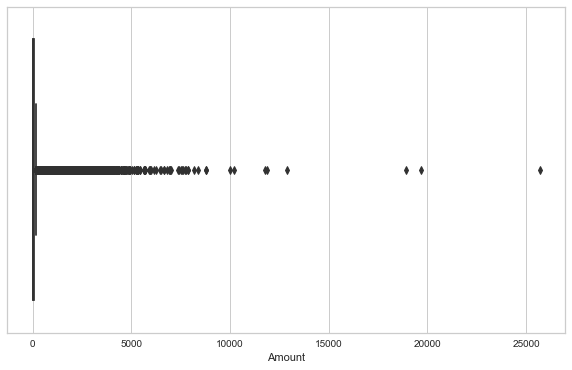

In [58]:
sns.boxplot(df.Amount)

In [59]:
amount_out=df[df['Amount']>10000]
amount_out

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour,Day,Hour_Class
284249,172273.000,-9.031,-11.113,-16.234,3.592,-40.428,23.918,44.054,-7.278,-4.211,-7.776,0.214,-4.500,0.241,0.538,2.902,2.326,-0.402,1.257,2.008,2.455,-0.269,0.988,7.040,0.348,2.521,2.342,3.478,-2.713,10199.440,0,23,Day2,Evening
58465,48401.000,-36.802,-63.345,-20.646,16.716,-20.672,7.694,24.957,-4.730,-2.687,-8.423,1.186,1.880,3.497,4.083,1.406,0.773,0.903,5.041,-7.214,39.421,11.455,-10.933,-17.174,1.181,-7.026,-2.534,-3.602,3.450,19656.530,0,13,Day1,Afternoon
169457,119713.000,-20.925,-37.943,-14.060,10.473,-10.867,6.257,14.961,-2.392,-0.597,-5.341,0.713,1.361,1.411,2.970,1.441,1.134,0.298,1.341,-4.392,23.649,6.830,-6.926,-9.929,-0.447,-4.848,-2.242,-2.141,2.001,11789.840,0,9,Day2,Morning
274771,166198.000,-35.549,-31.850,-48.326,15.304,-113.743,73.302,120.589,-27.347,-3.872,-12.005,6.854,-9.189,7.127,-6.796,8.878,17.315,-7.174,-1.968,5.502,-54.498,-21.620,5.712,-1.581,4.585,4.555,3.416,31.612,-15.430,25691.160,0,22,Day2,Evening
54018,46253.000,-21.781,-38.305,-12.122,9.753,-12.881,4.256,14.785,-2.818,-0.667,-5.546,1.068,0.833,1.592,2.789,2.570,2.722,-0.614,3.491,-3.839,24.134,7.437,-5.619,-10.547,0.653,-4.232,-0.480,-2.258,2.082,11898.090,0,12,Day1,Morning
46841,42951.000,-23.713,-42.173,-13.321,9.925,-13.946,5.565,15.711,-2.844,-1.581,-5.533,1.447,0.903,1.747,2.354,0.802,2.068,1.413,0.748,-3.637,26.237,7.922,-6.321,-11.310,0.404,-4.547,-1.577,-2.357,2.254,12910.930,0,11,Day1,Morning
151296,95286.000,-34.549,-60.465,-21.341,16.875,-19.229,6.335,24.423,-4.965,0.189,-8.908,-0.084,-2.282,3.739,5.989,2.582,3.033,0.531,4.712,-6.938,38.117,11.503,-9.499,-16.513,0.744,-7.081,-2.605,-3.551,3.251,18910.000,0,2,Day2,Night


In [60]:
df=df[~(df.Amount>10000)]

In [61]:
df.Amount[df.Amount>10000].count()

0

<AxesSubplot:xlabel='Amount', ylabel='Density'>

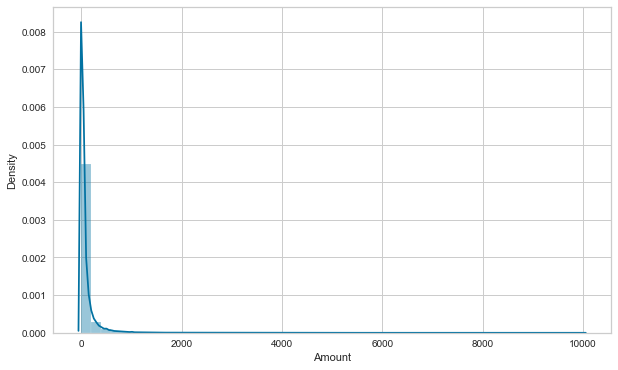

In [62]:
sns.distplot(df['Amount'])

**I decided to classify amount values.**

In [64]:
def amount_class(x):
    
    """This function classifies amounts!!!"""
    
    if x <= 20:
        return "Low"
    elif x <= 100:
        return "Middle"
    elif x <= 500:
        return "High"
    else:
        return "VeryHigh"
    
df["Amount_Class"] = df["Amount"].apply(amount_class)

In [65]:
column_to_move = df.pop("Amount_Class")
df.insert(1, "Amount_Class", column_to_move)

In [66]:
df.groupby("Amount_Class")["Amount"].mean()

Amount_Class
High        212.601
Low           6.984
Middle       50.565
VeryHigh   1041.273
Name: Amount, dtype: float64

Total number of transactions in  HIGH : 47290
Total number of transactions in  LOW : 138489
Total number of transactions in  MIDDLE : 88838
Total number of transactions in  VERYHIGH : 9102


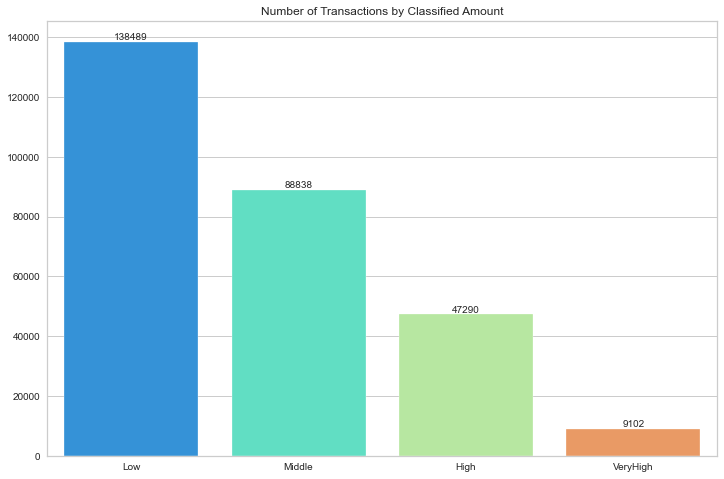

In [67]:
for i in df.groupby("Amount_Class")["Class"].count().index:
    print("Total number of transactions in ", i.upper(),":", df.groupby("Amount_Class")["Class"].count().loc[i])

plt.figure(figsize=(12,8))
plt.title("Number of Transactions by Classified Amount")
ax = sns.barplot(x=df["Amount_Class"].value_counts().index, y=df["Amount_Class"].value_counts().values, palette="rainbow")
ax.bar_label(ax.containers[0])
plt.show()

[Text(0, 0, '1041.27'),
 Text(0, 0, '212.601'),
 Text(0, 0, '50.5653'),
 Text(0, 0, '6.98432')]

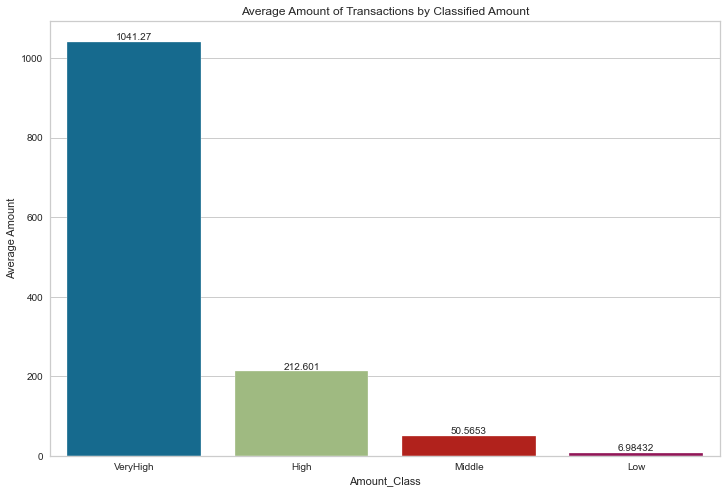

In [72]:
plt.figure(figsize=(12,8))
plt.title("Average Amount of Transactions by Classified Amount")
ax = sns.barplot(x="Amount_Class", y="Average Amount", data=df.groupby("Amount_Class")["Amount"].mean().to_frame(name = 'Average Amount').reset_index(),
                 order=["VeryHigh", "High", "Middle", "Low"])
ax.bar_label(ax.containers[0])

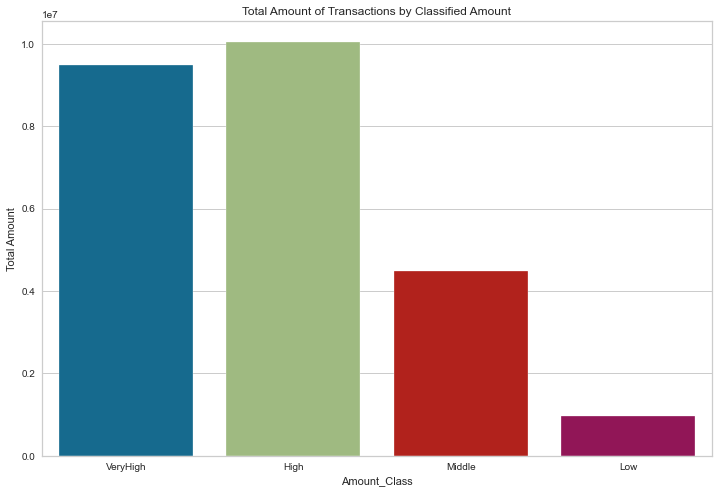

In [75]:
plt.figure(figsize=(12,8))
plt.title("Total Amount of Transactions by Classified Amount")
ax = sns.barplot(x="Amount_Class", y="Total Amount", data=df.groupby("Amount_Class")["Amount"].sum().to_frame(name = 'Total Amount').reset_index(),
                 order=["VeryHigh", "High", "Middle", "Low"])

In [70]:
df_fraud = df[df['Class'] == 1] # refreshing the df_fraud

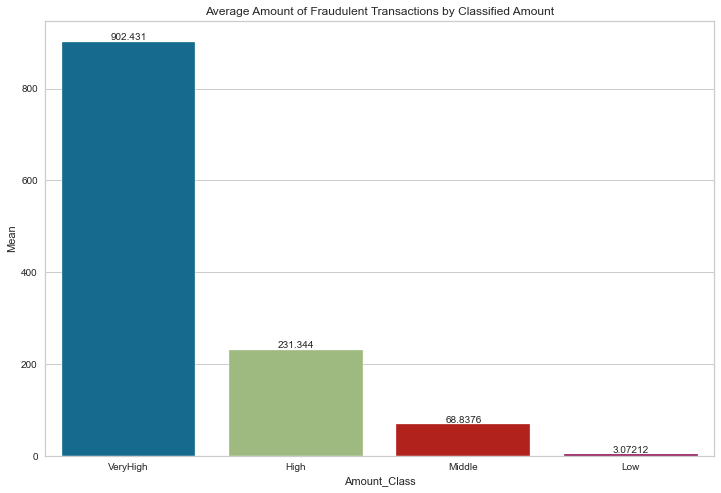

In [79]:
plt.figure(figsize=(12,8))
plt.title("Average Amount of Fraudulent Transactions by Classified Amount")
ax = sns.barplot(x="Amount_Class", y="Mean", data=df_fraud.groupby("Amount_Class")["Amount"].mean().to_frame(name = 'Mean').reset_index(),
                 order=["VeryHigh", "High", "Middle", "Low"])
ax.bar_label(ax.containers[0]);

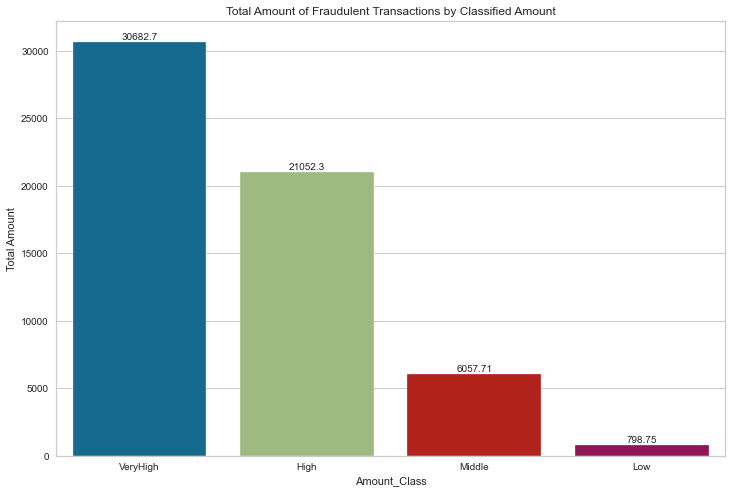

In [77]:
plt.figure(figsize=(12,8))
plt.title("Total Amount of Fraudulent Transactions by Classified Amount")
ax = sns.barplot(x="Amount_Class", y="Total Amount", data=df_fraud.groupby("Amount_Class")["Amount"].sum().to_frame(name = 'Total Amount').reset_index(),
                 order=["VeryHigh", "High", "Middle", "Low"])
ax.bar_label(ax.containers[0]);

In [78]:
df.shape

(283719, 35)

In [80]:
df.columns

Index(['Time', 'Amount_Class', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Amount', 'Class', 'Hour', 'Day', 'Hour_Class'],
      dtype='object')

In [81]:
df.drop(['Time', 'Amount_Class', 'Day', 'Hour_Class'], axis=1, inplace=True)

In [82]:
df1=df.copy()

In [83]:
df1["Class"].value_counts()

0    283246
1       473
Name: Class, dtype: int64

In [84]:
df.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
274265,1.198,-2.037,-1.404,-0.693,-0.679,0.127,0.002,-0.053,1.238,-0.487,0.177,1.080,0.542,0.149,0.268,0.616,-0.958,0.334,0.895,0.799,-0.001,-0.894,-0.109,-1.120,-0.692,0.290,-0.127,0.010,458.000,0,22
7493,-2.528,-1.451,1.406,-0.957,1.924,0.780,-0.357,0.656,1.311,-0.910,2.744,-1.923,0.992,1.731,0.389,-0.300,0.869,-1.279,-1.862,-0.425,-0.199,0.268,1.622,-1.408,-0.295,0.869,0.394,-0.031,21.370,0,2
176706,2.269,-1.396,-0.836,-1.557,-1.419,-0.777,-1.192,-0.079,-1.326,1.783,0.629,-0.657,-0.866,0.046,-0.758,-0.468,0.429,0.360,0.065,-0.548,-0.127,0.111,0.261,-0.031,-0.258,-0.175,0.004,-0.066,0.930,0,10


---
---


## 2. Data Preprocessing

#### Scaling

In [85]:
scaler = StandardScaler()
df1['Amount'] = scaler.fit_transform(df1['Amount'].values.reshape(-1,1))


In [86]:
df1.shape

(283719, 31)

#### Train - Test Split

As in this case, for extremely imbalanced datasets we may want to make sure that classes are balanced across train and test data.

In [87]:
X = df1.drop("Class",axis=1)
y = df1.Class

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y )

In [80]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (226975, 30)
Train target shape   :  (226975,)
Test features shape  :  (56744, 30)
Test target shape    :  (56744,)


---
---


## 3. Model Building
It was previously stated that we need to make class prediction with three different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset we can use undersampling and oversampling data approach techniques. Oversampling increases the number of minority class members in the training set. The advantage of oversampling is that no information from the original training set is lost unlike in undersampling, as all observations from the minority and majority classes are kept. On the other hand, it is prone to overfitting. 

There is a type of oversampling called **[SMOTE](https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/)** (Synthetic Minority Oversampling Technique), which we are going to use to make our dataset balanced. It creates synthetic points from the minority class.

- It is important that we can evaluate the effectiveness of SMOTE. For this reason, implement the Logistic Regression algorithm in two different ways, with SMOTE applied and without.

***Note***: 

- *Do not forget to import the necessary libraries and modules before starting the model building!*

- *If we are going to use the cross validation method to be more sure of the performance of our model for unbalanced data, we should make sure that the class distributions in the iterations are equal. For this case, we should use **[StratifiedKFold](https://www.analyseup.com/python-machine-learning/stratified-kfold.html)** instead of regular cross validation method.*

### Logistic Regression without SMOTE

- The steps we are going to cover for this algorithm are as follows: 

   i. Import Libraries
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Import Libraries***

***ii. Model Training***

In [89]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [90]:
log_model = LogisticRegression(class_weight='balanced', random_state=42)
log_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [91]:
y_pred = log_model.predict(X_test)
y_train_pred = log_model.predict(X_train)
y_pred_proba = log_model.predict_proba(X_test)

In [92]:
eval_metric(log_model, X_train, y_train, X_test, y_test)

Test_Set
[[55191  1458]
 [   12    83]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56649
           1       0.05      0.87      0.10        95

    accuracy                           0.97     56744
   macro avg       0.53      0.92      0.54     56744
weighted avg       1.00      0.97      0.99     56744


Train_Set
[[221186   5411]
 [    29    349]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    226597
           1       0.06      0.92      0.11       378

    accuracy                           0.98    226975
   macro avg       0.53      0.95      0.55    226975
weighted avg       1.00      0.98      0.99    226975



In [93]:
scoring = {"f1_Fraud" : make_scorer(f1_score, pos_label=1),
           "precision_Fraud" : make_scorer(precision_score,  pos_label=1),
           "recall_Fraud" : make_scorer(recall_score,  pos_label=1)}

In [94]:
model = LogisticRegression(class_weight='balanced', random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores

,fit_time,score_time,test_f1_Fraud,test_precision_Fraud,test_recall_Fraud
1,6.884,0.070,0.121,0.064,0.920
2,6.894,0.099,0.105,0.056,0.893
3,7.080,0.065,0.110,0.059,0.921
4,6.399,0.069,0.117,0.063,0.895
5,6.285,0.101,0.104,0.055,0.934


In [95]:
log_model = LogisticRegression(C= 0.1,penalty= 'l1', solver='saga', class_weight='balanced',max_iter=1000,random_state=42)
stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(log_model, X, y,  cv = stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.96417242 0.97601509 0.96762653 0.95211829 0.95673475]
Average Cross Validation score :0.9633334158140118


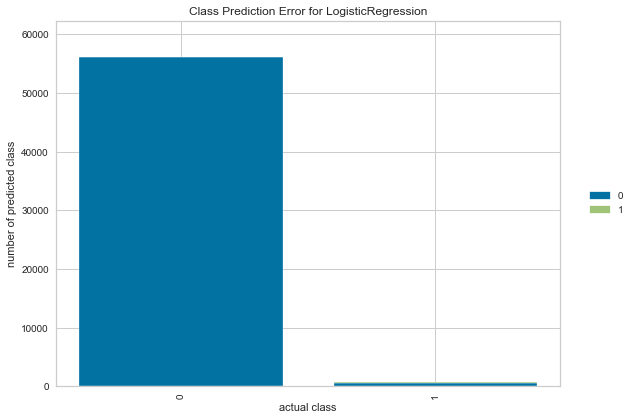

In [88]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(log_model)
# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)
# Evaluate the model on the test data
visualizer.score(X_test, y_test)
# Draw visualization
visualizer.poof();

***iii. Prediction and Model Evaluating***

In [89]:
recall_Fraud =  make_scorer(recall_score, pos_label=1)

In [90]:
model = LogisticRegression()

penalty = ["l1", "l2"]
C = [0.05, 0.1, 0.3, 0.5, 1] #np.logspace(-1, 5, 20)
class_weight= ["balanced"] 

solver = ["lbfgs", "liblinear", "saga"]

param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}

log_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=5,
                          scoring = recall_Fraud,  
                          n_jobs = -1, refit=True)

In [91]:
log_grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.05, 0.1, 0.3, 0.5, 1],
                         'class_weight': ['balanced'], 'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'saga']},
             scoring=make_scorer(recall_score, pos_label=1))

In [92]:
log_grid_model.best_params_

{'C': 0.5, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'saga'}

In [93]:
log_grid_model.best_score_

0.9207719298245614

In [94]:
eval_metric(log_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[55262  1387]
 [   12    83]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56649
           1       0.06      0.87      0.11        95

    accuracy                           0.98     56744
   macro avg       0.53      0.92      0.55     56744
weighted avg       1.00      0.98      0.99     56744


Train_Set
[[221101   5496]
 [    30    348]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    226597
           1       0.06      0.92      0.11       378

    accuracy                           0.98    226975
   macro avg       0.53      0.95      0.55    226975
weighted avg       1.00      0.98      0.99    226975



We are evaluating "accuracy score"? Is your performance metric reflect real success? We may need to use different metrics to evaluate performance on unbalanced data. We should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

***iv. Plot Precision and Recall Curve***


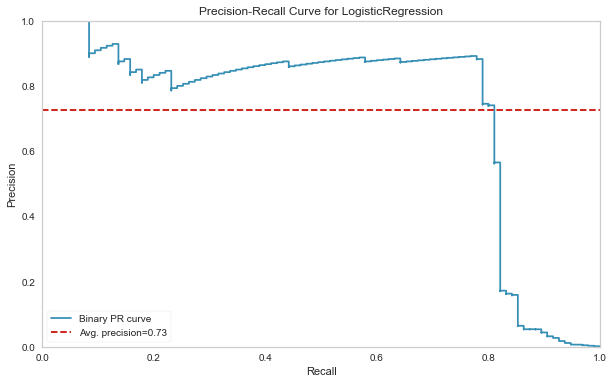

In [95]:
from yellowbrick.classifier import PrecisionRecallCurve

model = LogisticRegression(C= 0.1,penalty= 'l1', solver='saga', class_weight='balanced',max_iter=1000,random_state=42)

viz = PrecisionRecallCurve(
    model,
    per_class=True, #classes= [0,1],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [96]:
viz.score_

0.7256028021824106

In [97]:
y_pred = log_grid_model.predict(X_test)

log_AP = viz.score_
log_f1 = f1_score(y_test, y_pred, pos_label=1)
log_recall = recall_score(y_test, y_pred, pos_label=1)

## Finding Best Threshold for max recall score

In [98]:
y_pred_proba = log_model.predict_proba(X_train) # treshold basic model üzerinden belirlenir.
roc_auc_score(y_train, y_pred_proba[:,1])

0.9865745092568485

In [99]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

In [100]:
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.20176540360577885

In [101]:
y_pred2 = pd.Series(log_grid_model.predict_proba(X_test)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0) # prediction grid model üzerinden

In [102]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[51609  5040]
 [    7    88]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     56649
           1       0.02      0.93      0.03        95

    accuracy                           0.91     56744
   macro avg       0.51      0.92      0.49     56744
weighted avg       1.00      0.91      0.95     56744



***v. Apply and Plot StratifiedKFold***

In [103]:
from sklearn.model_selection import StratifiedKFold

def CV(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [104]:
model = LogisticRegression(C= 0.1,penalty= 'l1', solver='saga', class_weight='balanced',max_iter=1000,random_state=42)
CV(10, model, pd.DataFrame(X_train),pd.DataFrame(y_train), optimal_threshold)

Accuracy      91.93%  std 2.71%
Precision-1    3.50%  std 5.25%
Recall-1      93.88%  std 4.20%
F1_score-1     6.30%  std 8.58%


- Didn't the performance of the model we implemented above satisfy we? If our model is biased towards the majority class and minority class recall is not sufficient, apply **SMOTE**.

### Apply SMOTE

In [105]:
from sklearn.metrics import matthews_corrcoef 
y_pred = log_model.predict(X_test)
matthews_corrcoef(y_test, y_pred)

0.32757153208730844

In [106]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.21964492680461956

In [107]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [108]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

### Logistic Regression with SMOTE

- The steps we are going to cover for this algorithm are as follows:
   
   *i. Train-Test Split (Again)*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Train-Test Split (Again)***

Use SMOTE applied data.

In [109]:
over = SMOTE(sampling_strategy={1: 2000}) 
under = RandomUnderSampler(sampling_strategy={0: 50000}) 

***ii. Model Training***

In [110]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train, y_train)

In [111]:
y_resampled_over.value_counts()

0    226597
1      2000
Name: Class, dtype: int64

In [112]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train, y_train)

***iii. Prediction and Model Evaluating***

In [113]:
steps = [('o', over), ('u', under)]

In [114]:
pipeline = imbpipeline(steps=steps)

In [115]:
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

In [116]:
operations = [('o', over), ('u', under), 
              ("log", LogisticRegression(C= 0.1,penalty= 'l1', solver='saga', class_weight='balanced',max_iter=1000,random_state=42))]

In [117]:
smote_pipeline = imbpipeline(steps=operations)

In [118]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('o', SMOTE(sampling_strategy={1: 2000})),
                ('u', RandomUnderSampler(sampling_strategy={0: 50000})),
                ('log',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    max_iter=1000, penalty='l1',
                                    random_state=42, solver='saga'))])

In [119]:
y_resampled.value_counts()

0    50000
1     2000
Name: Class, dtype: int64

In [120]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[55237  1412]
 [   12    83]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56649
           1       0.06      0.87      0.10        95

    accuracy                           0.97     56744
   macro avg       0.53      0.92      0.55     56744
weighted avg       1.00      0.97      0.99     56744


Train_Set
[[221093   5504]
 [    28    350]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    226597
           1       0.06      0.93      0.11       378

    accuracy                           0.98    226975
   macro avg       0.53      0.95      0.55    226975
weighted avg       1.00      0.98      0.99    226975



In [121]:
model = smote_pipeline = imbpipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_Fraud          0.108
test_precision_Fraud   0.057
test_recall_Fraud      0.918
dtype: float64

***iv.  Plot Precision and Recall Curve***


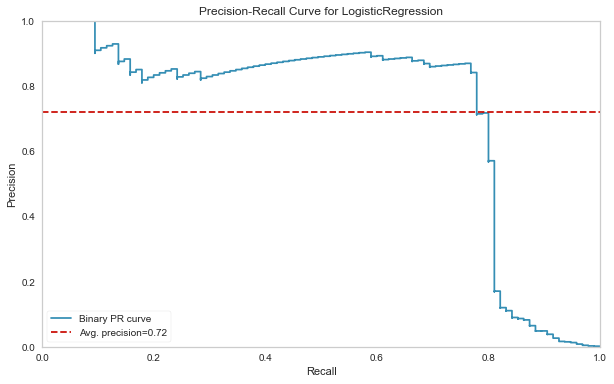

In [122]:
operations = [('o', over), ('u', under), 
              ("log", LogisticRegression(C= 0.1,penalty= 'l1', solver='saga', class_weight='balanced',max_iter=1000,random_state=42))]
smote_pipeline = imbpipeline(steps=operations)

viz = PrecisionRecallCurve(
    smote_pipeline,
    per_class=True, classes= [0,1],
    cmap="Set1",
    )
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

***v. Apply and Plot StratifiedKFold***

In [123]:
from sklearn.model_selection import StratifiedKFold

def CV(n, est, X, y):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
             
     
        acc_scores.append(accuracy_score(y_test, y_pred))
        pre_scores.append(precision_score(y_test, y_pred, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [124]:
model = LogisticRegression(C= 0.1,penalty= 'l1', solver='saga', class_weight='balanced',max_iter=1000,random_state=42)
CV(5, model, pd.DataFrame(X_train), pd.DataFrame(y_train))

Accuracy      96.80%  std 1.22%
Precision-1    5.01%  std 1.26%
Recall-1      91.29%  std 3.37%
F1_score-1     9.45%  std 2.28%


Logistic Final model

In [125]:
log_final_model = LogisticRegression(C= 0.1, class_weight= 'balanced',penalty= 'l1',solver= 'saga').fit(X, y)

In [126]:
from sklearn.metrics import matthews_corrcoef 
y_pred = log_final_model.predict(X_test)
matthews_corrcoef(y_test, y_pred)

0.20521524047767215

### Random Forest Classifier with SMOTE

- The steps we are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating*
   
   *iii. Plot Precision and Recall Curve*
   
   *iv. Apply and Plot StratifiedKFold*
   

***i. Model Training***

In [127]:
df2 = df[ ( (df["Class"] == 1) | ((df["Class"] == 0) & (df["V17"].values > df[(df["Class"] == 1)]["V17"].max())) | ((df["Class"] == 0) & (df["V17"].values < df[(df["Class"] == 1)]["V17"].min()))  ) |   
          ( (df["Class"] == 1) | ((df["Class"] == 0) & (df["V14"].values > df[(df["Class"] == 1)]["V14"].max())) | ((df["Class"] == 0) & (df["V14"].values < df[(df["Class"] == 1)]["V14"].min()))  ) |            
          ( (df["Class"] == 1) | ((df["Class"] == 0) & (df["V12"].values > df[(df["Class"] == 1)]["V12"].max())) | ((df["Class"] == 0) & (df["V12"].values < df[(df["Class"] == 1)]["V12"].min()))  ) |           
          ( (df["Class"] == 1) | ((df["Class"] == 0) & (df["V10"].values > df[(df["Class"] == 1)]["V10"].max())) | ((df["Class"] == 0) & (df["V10"].values < df[(df["Class"] == 1)]["V10"].min())) )]           

In [128]:
#####################       11 SÜTUN,  AZALTILMIŞ DATA + SMOTE, 1 SINIFINI % 99 DOĞRU TAHMİN         ##########################
# V17, V14, V12, V10 FEATURE'LARININ CLASS_1 MAX-MİN DEĞERLERİNİN DIŞINDA KALAN SIFIR SINIFI DEĞERLERİNİN SEÇİLDİĞİ DF2'YE GÖRE:

In [129]:
selected_df = df2[['V14', 'V10', 'V17', 'V4', 'V11', 'V12', 'V3', 'V16', 'V7', 'V1', 'V9']]   

In [130]:
X = selected_df
y = df2['Class']

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)

In [132]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over = SMOTE(sampling_strategy=.2)
under = RandomUnderSampler(sampling_strategy=1)
steps=[('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_train, y_train = pipeline.fit_resample(X_train, y_train)

In [133]:
print('X_train.shape : ', X_train.shape)
print('X_test.shape  : ', X_test.shape)

X_train.shape :  (3478, 11)
X_test.shape  :  (2269, 11)


In [134]:
cprint('y_train.value_counts','white', 'on_green')
y_train.value_counts()

y_train.value_counts


0    1739
1    1739
Name: Class, dtype: int64

In [135]:
cprint('y_test.value_counts','white', 'on_green')
y_test.value_counts()

y_test.value_counts


0    2174
1      95
Name: Class, dtype: int64

In [136]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [137]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("\033[1m---------------------Test Scores---------------------\033[0m")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("\033[1m---------------------Train Scores---------------------\033[0m")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    plot_confusion_matrix(model, X_test, y_test, cmap="BuPu")
    

---------------------Test Scores---------------------
[[2173    1]
 [   0   95]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2174
           1       0.99      1.00      0.99        95

    accuracy                           1.00      2269
   macro avg       0.99      1.00      1.00      2269
weighted avg       1.00      1.00      1.00      2269


---------------------Train Scores---------------------
[[1739    0]
 [   0 1739]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1739
           1       1.00      1.00      1.00      1739

    accuracy                           1.00      3478
   macro avg       1.00      1.00      1.00      3478
weighted avg       1.00      1.00      1.00      3478



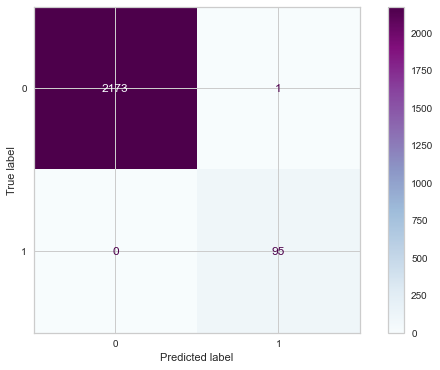

In [138]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

In [139]:
cprint('Cross Validation scores for Random Forest with default parameters(SMOTE)','white', 'on_green')
model_rfs_cv = RandomForestClassifier(class_weight = "balanced", random_state = 42)
model_rfs_cv_scores = cross_validate(model_rfs_cv, X_train, y_train, 
                              scoring = ['accuracy', 'precision','recall', 'f1', 'roc_auc'], cv = 10)
model_rfs_cv_scores = pd.DataFrame(model_rfs_cv_scores, index = range(1, 11))
model_rfs_cv_scores.mean()[2:]

Cross Validation scores for Random Forest with default parameters(SMOTE)


test_accuracy    0.998
test_precision   0.998
test_recall      0.998
test_f1          0.998
test_roc_auc     1.000
dtype: float64

In [140]:
param_grid = {'n_estimators':[16, 32, 48, 64],   
             'max_features':[3, 4, 5, 6, 7],
             'max_depth':[5,7,9,10],
             'min_samples_split':[3, 4, 5]}

In [141]:
rfs_grid = RandomForestClassifier(class_weight = 'balanced', bootstrap=True, random_state = 42)
model_rfs_grid = GridSearchCV(estimator = rfs_grid, 
                             param_grid = param_grid, 
                             scoring = "recall", 
                             n_jobs = -1, verbose = 2)
model_rfs_grid.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 7, 9, 10],
                         'max_features': [3, 4, 5, 6, 7],
                         'min_samples_split': [3, 4, 5],
                         'n_estimators': [16, 32, 48, 64]},
             scoring='recall', verbose=2)

In [142]:
model_rfs_grid.cv_results_["mean_test_score"].mean()

0.998014846743295

In [143]:
print(colored(model_rfs_grid.best_estimator_, 'blue'))

RandomForestClassifier(class_weight='balanced', max_depth=9, max_features=3,
                       min_samples_split=3, n_estimators=16, random_state=42)


In [144]:
rfs_tuned = RandomForestClassifier(class_weight = 'balanced', 
                                       max_depth = 5,
                                       max_features = 4,
                                       min_samples_split = 3,
                                       n_estimators = 16,
                                       random_state = 42).fit(X_train, y_train)

RFSmote_tuned
------------------
---------------------Test Scores---------------------
[[2173    1]
 [   0   95]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2174
           1       0.99      1.00      0.99        95

    accuracy                           1.00      2269
   macro avg       0.99      1.00      1.00      2269
weighted avg       1.00      1.00      1.00      2269


---------------------Train Scores---------------------
[[1738    1]
 [   1 1738]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1739
           1       1.00      1.00      1.00      1739

    accuracy                           1.00      3478
   macro avg       1.00      1.00      1.00      3478
weighted avg       1.00      1.00      1.00      3478



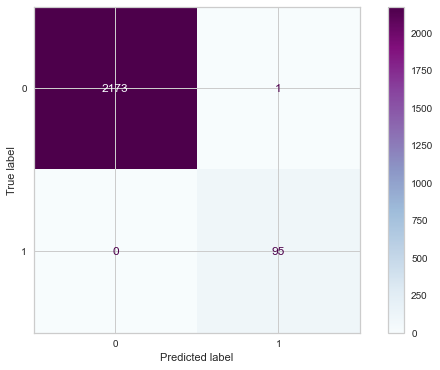

In [145]:
print("RFSmote_tuned")
print ("------------------")
eval_metric(rfs_tuned, X_train, y_train, X_test, y_test)

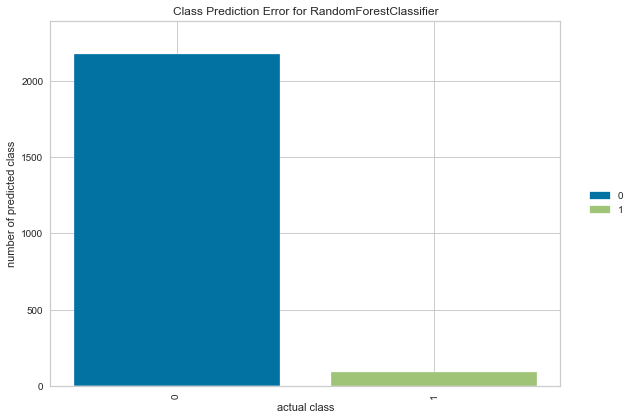

In [146]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(rfs_tuned)
# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)
# Evaluate the model on the test data
visualizer.score(X_test, y_test)
# Draw visualization
visualizer.poof();

roc_curve


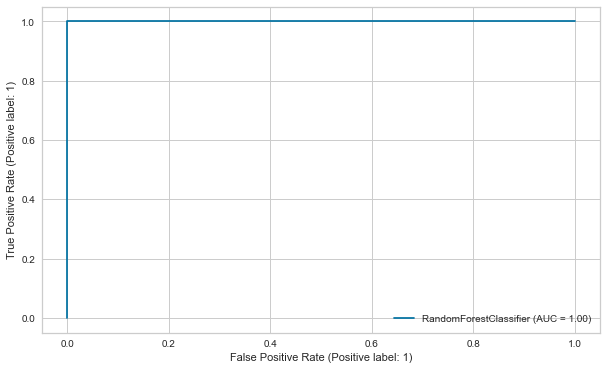

In [147]:
cprint('roc_curve','white', 'on_green')
plot_roc_curve(rfs_tuned, X_test, y_test);

precision_recall_curve


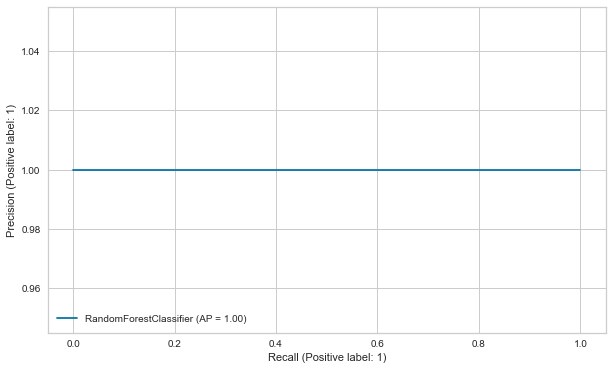

In [148]:
cprint('precision_recall_curve','white', 'on_green')
plot_precision_recall_curve(rfs_tuned, X_test, y_test);

In [149]:
y_pred = rfs_tuned.predict(X_test)
cprint('RF_Smote_tuned Predictions','white', 'on_green')
rfs_pred = {"Actual": y_test, "RF_Smote_Pred":y_pred}
rfs_pred = pd.DataFrame.from_dict(rfs_pred)
rfs_pred.sample(10)

RF_Smote_tuned Predictions


,Actual,RF_Smote_Pred
165937,0,0
30848,0,0
194004,0,0
218442,1,1
227432,0,0
269718,0,0
31130,0,0
61303,0,0
137822,0,0
34366,0,0


In [150]:
pd.crosstab(rfs_pred['Actual'], rfs_pred['RF_Smote_Pred'])

RF_Smote_Pred,0,1
Actual,,
0,2173,1
1,0,95


In [151]:
my_dict = df[df.Class == 1][['V14', 'V10', 'V17', 'V4', 'V11', 'V12', 'V3', 'V16', 'V7', 'V1', 'V9']].reset_index(drop = True).sample(470)
my_dict

,V14,V10,V17,V4,V11,V12,V3,V16,V7,V1,V9
99,-19.214,-12.841,-15.503,9.007,12.019,-17.769,-11.035,-10.267,-7.810,-2.125,-5.903
47,-4.252,-0.374,2.934,4.617,-0.688,-1.463,-1.776,1.733,-0.041,1.853,-0.218
338,-7.629,-6.600,-14.065,5.547,3.368,-7.889,-4.454,-7.533,-6.805,-3.897,-4.917
133,-5.232,-5.208,-4.848,3.387,4.546,-7.761,-5.923,-4.720,-3.879,-1.533,-1.466
86,-9.073,-5.053,-6.248,3.320,4.407,-4.611,-9.907,-6.212,-18.751,-13.193,-0.392
...,...,...,...,...,...,...,...,...,...,...,...
187,-0.658,-0.159,0.654,0.117,1.200,0.282,-0.494,0.056,0.438,0.115,-0.186
146,-6.192,-4.684,-6.189,3.921,4.377,-5.007,-3.918,-3.317,-3.614,-4.199,-2.190
3,0.016,-0.091,-0.057,1.401,-0.921,-0.614,1.265,-0.527,1.302,-0.639,-0.432
352,-9.093,-9.040,-13.797,6.039,5.966,-8.464,-21.403,-7.186,-14.856,-18.475,-4.053


In [152]:
result = rfs_tuned.predict(my_dict)
result

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [153]:
(result == 1).sum()

469

In [154]:
from sklearn.metrics import matthews_corrcoef
y_pred = rfs_tuned.predict(X_test)
matthews_corrcoef(y_test, y_pred)

0.9945492160811374

In [155]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.9945343607803652

In [156]:
#####################       4 SÜTUN,  AZALTILMIŞ DATA + SMOTE, 1 SINIFINI % 90 DOĞRU TAHMİN         ##########################

In [157]:
selected_df = df2[['V14', 'V10', 'V17', 'V12']]   

In [158]:
X = selected_df
y = df2['Class']

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)

In [160]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over = SMOTE(sampling_strategy=.2)
under = RandomUnderSampler(sampling_strategy=1)
steps=[('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_train_s, y_train_s = pipeline.fit_resample(X_train, y_train)

In [161]:
print('X_train.shape : ', X_train_s.shape)
print('X_test.shape  : ', X_test.shape)

X_train.shape :  (3478, 4)
X_test.shape  :  (2269, 4)


In [162]:
cprint('y_train.value_counts','white', 'on_green')
y_train_s.value_counts()

y_train.value_counts


0    1739
1    1739
Name: Class, dtype: int64

In [163]:
cprint('y_test.value_counts','white', 'on_green')
y_test.value_counts()

y_test.value_counts


0    2174
1      95
Name: Class, dtype: int64

In [164]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_model.fit(X_train_s, y_train_s)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [165]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("\033[1m---------------------Test Scores---------------------\033[0m")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("\033[1m---------------------Train Scores---------------------\033[0m")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    plot_confusion_matrix(model, X_test, y_test, cmap="BuPu")
    

---------------------Test Scores---------------------
[[2172    2]
 [   0   95]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2174
           1       0.98      1.00      0.99        95

    accuracy                           1.00      2269
   macro avg       0.99      1.00      0.99      2269
weighted avg       1.00      1.00      1.00      2269


---------------------Train Scores---------------------
[[1739    0]
 [   0 1739]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1739
           1       1.00      1.00      1.00      1739

    accuracy                           1.00      3478
   macro avg       1.00      1.00      1.00      3478
weighted avg       1.00      1.00      1.00      3478



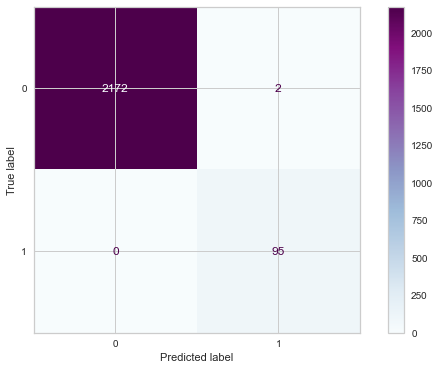

In [166]:
eval_metric(rf_model, X_train_s, y_train_s, X_test, y_test)

In [167]:
cprint('Cross Validation scores for Random Forest with default parameters(SMOTE)','white', 'on_green')
model_rfs_cv = RandomForestClassifier(class_weight = "balanced", random_state = 42)
model_rfs_cv_scores = cross_validate(model_rfs_cv, X_train_s, y_train_s, 
                              scoring = ['accuracy', 'precision','recall', 'f1', 'roc_auc'], cv = 10)
model_rfs_cv_scores = pd.DataFrame(model_rfs_cv_scores, index = range(1, 11))
model_rfs_cv_scores.mean()[2:]

Cross Validation scores for Random Forest with default parameters(SMOTE)


test_accuracy    0.999
test_precision   0.999
test_recall      0.998
test_f1          0.999
test_roc_auc     1.000
dtype: float64

In [168]:
param_grid = {'n_estimators':[16, 32, 48, 64],   
             'max_features':[3, 4, 5, 6, 7],
             'max_depth':[5,7,9,10],
             'min_samples_split':[3, 4, 5]}

In [169]:
rfs_grid = RandomForestClassifier(class_weight = 'balanced', random_state = 42)
model_rfs_grid = GridSearchCV(estimator = rfs_grid, 
                             param_grid = param_grid, 
                             scoring = "recall", 
                             n_jobs = -1, verbose = 2)
model_rfs_grid.fit(X_train_s, y_train_s)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 7, 9, 10],
                         'max_features': [3, 4, 5, 6, 7],
                         'min_samples_split': [3, 4, 5],
                         'n_estimators': [16, 32, 48, 64]},
             scoring='recall', verbose=2)

In [170]:
print(colored(model_rfs_grid.best_estimator_, 'blue'))

RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=3,
                       min_samples_split=3, n_estimators=16, random_state=42)


In [171]:
rfs_tuned = RandomForestClassifier(class_weight = 'balanced', 
                                       max_depth = 5,
                                       max_features = 3,
                                       min_samples_split = 3,
                                       n_estimators = 16,
                                       random_state = 42).fit(X_train_s, y_train_s)

RFSmote_tuned
------------------
---------------------Test Scores---------------------
[[2172    2]
 [   0   95]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2174
           1       0.98      1.00      0.99        95

    accuracy                           1.00      2269
   macro avg       0.99      1.00      0.99      2269
weighted avg       1.00      1.00      1.00      2269


---------------------Train Scores---------------------
[[1739    0]
 [   1 1738]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1739
           1       1.00      1.00      1.00      1739

    accuracy                           1.00      3478
   macro avg       1.00      1.00      1.00      3478
weighted avg       1.00      1.00      1.00      3478



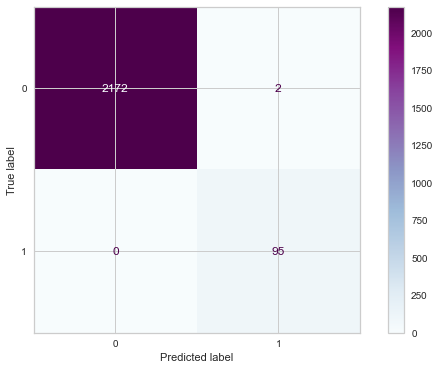

In [172]:
print("RFSmote_tuned")
print ("------------------")
eval_metric(rfs_tuned, X_train_s, y_train_s, X_test, y_test)

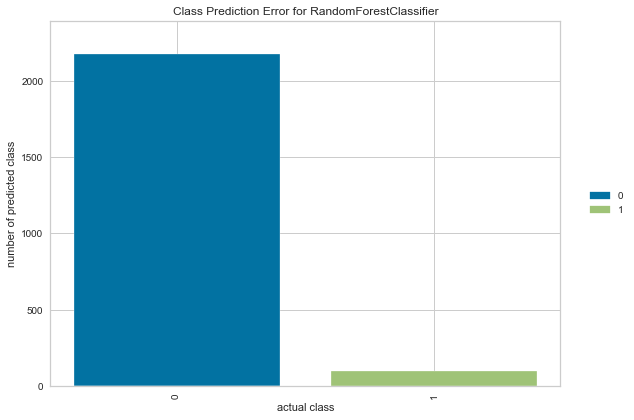

In [173]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(rfs_tuned)
# Fit the training data to the visualizer
visualizer.fit(X_train_s, y_train_s)
# Evaluate the model on the test data
visualizer.score(X_test, y_test)
# Draw visualization
visualizer.poof();

roc_curve


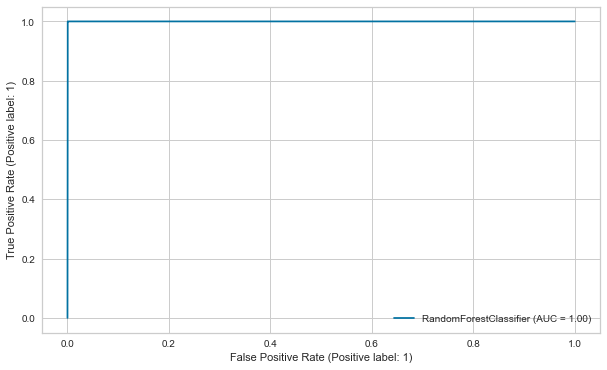

In [174]:
cprint('roc_curve','white', 'on_green')
plot_roc_curve(rfs_tuned, X_test, y_test);

precision_recall_curve


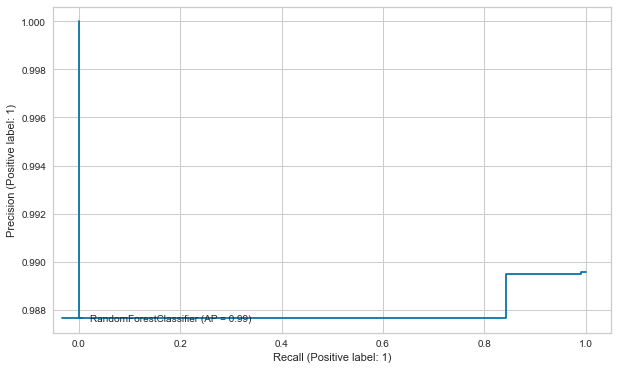

In [175]:
cprint('precision_recall_curve','white', 'on_green')
plot_precision_recall_curve(rfs_tuned, X_test, y_test);

In [176]:
y_pred = rfs_tuned.predict(X_test)
cprint('RF_Smote_tuned Predictions','white', 'on_green')
rfs_pred = {"Actual": y_test, "RF_Smote_Pred":y_pred}
rfs_pred = pd.DataFrame.from_dict(rfs_pred)
rfs_pred.sample(10)

RF_Smote_tuned Predictions


,Actual,RF_Smote_Pred
112309,0,0
53316,0,0
72828,0,0
166630,0,0
251891,1,1
2164,0,0
117950,0,0
92991,0,0
35066,0,0
22409,0,0


In [177]:
pd.crosstab(rfs_pred['Actual'], rfs_pred['RF_Smote_Pred'])

RF_Smote_Pred,0,1
Actual,,
0,2172,2
1,0,95


In [178]:
my_dict = df[df.Class == 1][['V10', 'V12', 'V14', 'V17']].reset_index(drop = True).sample(470)
my_dict

,V10,V12,V14,V17
306,-4.821,-4.619,-7.637,-7.605
192,-15.232,-12.894,-3.547,-18.372
384,-2.155,0.044,-5.054,4.027
373,-3.076,-3.192,-4.267,-2.820
207,-16.746,-15.565,-14.030,-15.834
...,...,...,...,...
242,-4.138,-7.629,-9.440,1.632
107,-4.760,-4.165,-7.624,-6.717
351,-5.526,-8.525,-7.679,-5.844
471,0.229,0.145,-2.954,1.715


In [179]:
result = rfs_tuned.predict(my_dict)
result

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [180]:
(result == 1).sum()

418

In [181]:
from sklearn.metrics import matthews_corrcoef
y_pred = rfs_tuned.predict(X_test)
matthews_corrcoef(y_test, y_pred)

0.9891817064679924

In [182]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.9891231921920914

In [183]:
random_forest_smote = pickle.dump(rfs_tuned, open('random_forest_smote(tuned)', 'wb'))

### Neural Network

In the final step, we will make classification with Neural Network which is a Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

We will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** our deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps we are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*

   *iii. Compile Model*

   *iv. Fit Model*

   *v. Prediction and Model Evaluating*

   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

In [184]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM , Dropout
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow import keras
from keras import optimizers
from tensorflow.keras.optimizers import Adam, SGD, Adamax, Nadam,  RMSprop,Adadelta
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [191]:
dl_df=df.copy()

In [192]:
dl_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
120500,1.411,-0.949,-0.610,-1.800,1.013,3.535,-1.587,0.927,-0.544,0.661,-0.077,-0.761,0.357,-0.323,1.294,1.802,-0.448,-0.418,0.592,0.241,0.335,0.754,-0.148,1.050,0.586,-0.035,0.039,0.021,22.000,0,21
223809,1.579,-1.026,-0.565,0.532,-1.033,-0.812,-0.226,-0.094,1.481,-0.288,-0.924,-0.162,-1.159,0.387,1.222,0.298,-0.569,0.192,-0.201,0.112,-0.011,-0.449,0.183,-0.038,-0.493,-0.954,0.009,0.008,218.000,0,15
54901,-1.182,-0.043,0.986,-0.332,-1.564,-0.107,0.992,0.467,-0.295,-1.073,0.790,0.473,-1.136,0.523,-0.930,0.052,0.133,0.020,0.809,0.430,0.057,-0.421,0.761,0.524,-0.541,0.728,-0.171,0.083,296.100,0,12
86108,-2.560,-0.697,0.791,0.534,-0.038,0.036,0.317,0.513,0.018,-0.302,0.823,0.890,-0.374,0.126,-0.935,-0.306,0.202,-0.258,0.442,-0.844,-0.166,0.660,1.219,0.081,0.121,0.437,0.453,-0.178,139.000,0,16
173409,2.076,-0.981,-0.041,-0.891,-1.279,-0.443,-1.194,-0.059,-0.078,0.699,-0.026,0.312,1.761,-0.763,0.924,1.512,-0.115,-1.269,-0.009,0.142,0.314,0.864,0.340,1.124,-0.499,-0.344,0.032,-0.017,35.910,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133629,0.987,-0.206,0.776,1.152,-0.624,0.170,-0.446,0.288,0.223,0.169,1.229,0.173,-1.425,0.641,0.938,0.438,-0.503,0.433,-0.703,-0.108,0.218,0.454,-0.089,-0.007,0.324,-0.291,0.035,0.027,71.000,0,22
181867,1.703,-0.612,-0.929,1.550,-0.144,0.195,-0.048,0.095,1.004,0.128,-0.216,0.854,-1.169,0.137,-2.270,-0.534,-0.119,-0.234,0.632,-0.108,-0.245,-0.642,0.086,-0.517,-0.006,-0.819,0.010,-0.039,125.000,0,10
56430,1.099,0.078,0.184,0.979,-0.356,-0.155,-0.330,0.237,0.484,-0.617,1.528,0.437,-1.450,-1.101,-0.574,0.001,1.302,0.154,-0.155,-0.174,-0.101,-0.105,-0.040,0.132,0.379,0.415,0.007,0.029,12.310,0,13
144939,-2.067,1.244,0.880,-0.761,0.366,1.237,0.254,0.063,1.870,1.228,-0.279,0.356,0.322,-1.021,1.298,-1.336,0.213,-1.122,-1.042,0.246,0.227,1.558,-0.154,-1.082,-0.372,-0.145,-0.605,-0.239,15.150,0,0


In [193]:
scaler = StandardScaler()
dl_df['Amount'] = scaler.fit_transform(dl_df['Amount'].values.reshape(-1,1))

In [194]:
dl_df.drop("Hour", axis=1, inplace=True)

In [195]:
dl_df_c=dl_df.drop("Class",axis=1, inplace=True)

In [196]:
dl_df_c=dl_df= pd.DataFrame(dl_df, columns=dl_df.columns)
dl_df_c

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
120500,1.411,-0.949,-0.610,-1.800,1.013,3.535,-1.587,0.927,-0.544,0.661,-0.077,-0.761,0.357,-0.323,1.294,1.802,-0.448,-0.418,0.592,0.241,0.335,0.754,-0.148,1.050,0.586,-0.035,0.039,0.021,-0.280
223809,1.579,-1.026,-0.565,0.532,-1.033,-0.812,-0.226,-0.094,1.481,-0.288,-0.924,-0.162,-1.159,0.387,1.222,0.298,-0.569,0.192,-0.201,0.112,-0.011,-0.449,0.183,-0.038,-0.493,-0.954,0.009,0.008,0.550
54901,-1.182,-0.043,0.986,-0.332,-1.564,-0.107,0.992,0.467,-0.295,-1.073,0.790,0.473,-1.136,0.523,-0.930,0.052,0.133,0.020,0.809,0.430,0.057,-0.421,0.761,0.524,-0.541,0.728,-0.171,0.083,0.880
86108,-2.560,-0.697,0.791,0.534,-0.038,0.036,0.317,0.513,0.018,-0.302,0.823,0.890,-0.374,0.126,-0.935,-0.306,0.202,-0.258,0.442,-0.844,-0.166,0.660,1.219,0.081,0.121,0.437,0.453,-0.178,0.215
173409,2.076,-0.981,-0.041,-0.891,-1.279,-0.443,-1.194,-0.059,-0.078,0.699,-0.026,0.312,1.761,-0.763,0.924,1.512,-0.115,-1.269,-0.009,0.142,0.314,0.864,0.340,1.124,-0.499,-0.344,0.032,-0.017,-0.221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133629,0.987,-0.206,0.776,1.152,-0.624,0.170,-0.446,0.288,0.223,0.169,1.229,0.173,-1.425,0.641,0.938,0.438,-0.503,0.433,-0.703,-0.108,0.218,0.454,-0.089,-0.007,0.324,-0.291,0.035,0.027,-0.072
181867,1.703,-0.612,-0.929,1.550,-0.144,0.195,-0.048,0.095,1.004,0.128,-0.216,0.854,-1.169,0.137,-2.270,-0.534,-0.119,-0.234,0.632,-0.108,-0.245,-0.642,0.086,-0.517,-0.006,-0.819,0.010,-0.039,0.156
56430,1.099,0.078,0.184,0.979,-0.356,-0.155,-0.330,0.237,0.484,-0.617,1.528,0.437,-1.450,-1.101,-0.574,0.001,1.302,0.154,-0.155,-0.174,-0.101,-0.105,-0.040,0.132,0.379,0.415,0.007,0.029,-0.321
144939,-2.067,1.244,0.880,-0.761,0.366,1.237,0.254,0.063,1.870,1.228,-0.279,0.356,0.322,-1.021,1.298,-1.336,0.213,-1.122,-1.042,0.246,0.227,1.558,-0.154,-1.082,-0.372,-0.145,-0.605,-0.239,-0.309


***ii. Define Model***

In [197]:
X = dl_df_c.values
y = df.Class.values

In [198]:
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    stratify=y,
                                                    test_size=0.1,
                                                    random_state=seed)

In [199]:
X_train.shape

(255347, 29)

***iii. Compile Model***

In [200]:
early_stop = EarlyStopping(monitor = "val_recall", verbose = 1, mode="max", patience = 10, restore_best_weights = True)

In [201]:
model = Sequential()

model.add(Dense(128, activation = "relu", input_dim = X_train.shape[1])) 
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid")) 

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

***iv. Fit Model***

In [202]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 200, verbose = 1,
          callbacks = [early_stop])

Epoch 1/200
7182/7182 [==============================] - 20s 3ms/step - loss: 0.0061 - recall: 0.7050 - val_loss: 0.0041 - val_recall: 0.5814
Epoch 2/200
7182/7182 [==============================] - 18s 3ms/step - loss: 0.0032 - recall: 0.7520 - val_loss: 0.0034 - val_recall: 0.7907
Epoch 3/200
7182/7182 [==============================] - 18s 3ms/step - loss: 0.0030 - recall: 0.7650 - val_loss: 0.0038 - val_recall: 0.7907
Epoch 4/200
7182/7182 [==============================] - 17s 2ms/step - loss: 0.0027 - recall: 0.7624 - val_loss: 0.0036 - val_recall: 0.8140
Epoch 5/200
7182/7182 [==============================] - 21s 3ms/step - loss: 0.0025 - recall: 0.7493 - val_loss: 0.0040 - val_recall: 0.8140
Epoch 6/200
7182/7182 [==============================] - 19s 3ms/step - loss: 0.0023 - recall: 0.7702 - val_loss: 0.0039 - val_recall: 0.8372
Epoch 7/200
7182/7182 [==============================] - 20s 3ms/step - loss: 0.0024 - recall: 0.7650 - val_loss: 0.0039 - val_recall: 0.8140
Epoch 

In [203]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3840      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
_________________________________________________________________


***v. Prediction and Model Evaluating***

In [204]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.006,0.705,0.004,0.581
1,0.003,0.752,0.003,0.791
2,0.003,0.765,0.004,0.791
3,0.003,0.762,0.004,0.814
4,0.003,0.749,0.004,0.814


<AxesSubplot:>

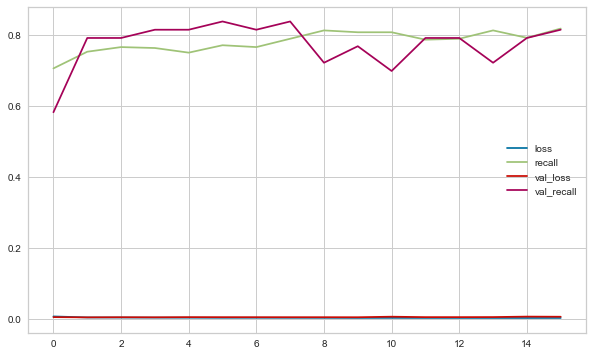

In [205]:
model_loss.plot()

In [206]:
model.evaluate(X_test, y_test, verbose=0)

[0.002967055654153228, 0.8297872543334961]

In [207]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.002967055654153228
accuracy :  0.8297872543334961


In [208]:
model.history.history

{}

***vi. Plot Precision and Recall Curve***

In [209]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[28318     7]
 [    8    39]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28325
           1       0.85      0.83      0.84        47

    accuracy                           1.00     28372
   macro avg       0.92      0.91      0.92     28372
weighted avg       1.00      1.00      1.00     28372



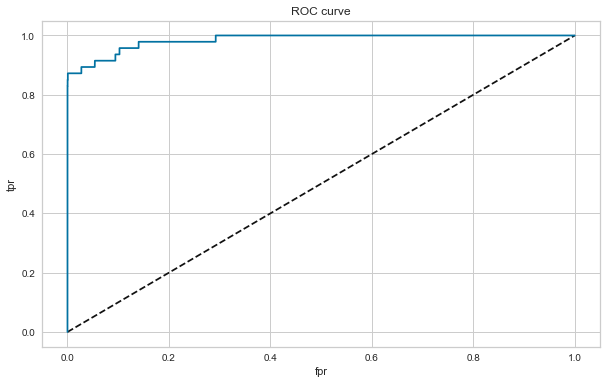

In [210]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

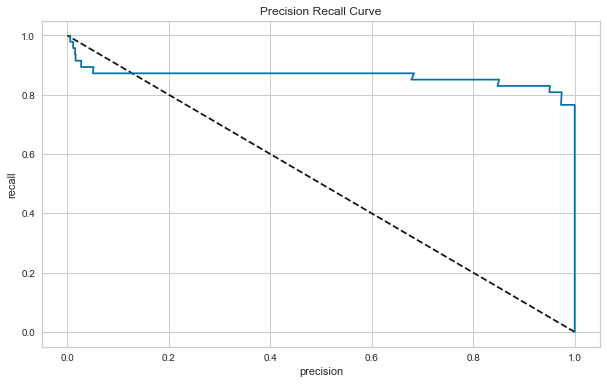

In [211]:
y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision Recall Curve')
plt.show();

In [212]:
average_precision_score(y_test, y_pred_proba)

0.8630008980010284

Cross Validate

In [213]:
def build_classifier():
    classifier = Sequential()
   
    classifier.add(Dense(128, activation = "relu", input_dim = X_train.shape[1])) # input dim burada oluşturunca ağırlıklar atanıyor.
    classifier.add(Dense(64, activation = "relu"))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(1, activation = "sigmoid")) # binary olduğundan sigmoid kullandın

    opt = Adam(lr = 0.001)
    classifier.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])
    return classifier

In [214]:
early_stop=EarlyStopping(monitor = "recall", verbose = 1, mode="max", patience = 3, restore_best_weights = True)

In [215]:
tf.random.set_seed(seed)

classifier_model = KerasClassifier(build_fn = build_classifier, batch_size = 128, epochs = 50, verbose=1, callbacks = [early_stop] )

scores = cross_validate(estimator = classifier_model, X = X_train, y = y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 5)

df_scores = pd.DataFrame(scores, index = range(1, 6)).iloc[:, 2:]

df_scores

Epoch 1/50
1596/1596 [==============================] - 5s 3ms/step - loss: 0.0084 - recall: 0.6364
Epoch 2/50
1596/1596 [==============================] - 4s 3ms/step - loss: 0.0030 - recall: 0.7654
Epoch 3/50
1596/1596 [==============================] - 4s 3ms/step - loss: 0.0028 - recall: 0.7683
Epoch 4/50
1596/1596 [==============================] - 4s 3ms/step - loss: 0.0025 - recall: 0.7654
Epoch 5/50
1596/1596 [==============================] - 4s 3ms/step - loss: 0.0023 - recall: 0.7683
Epoch 6/50
1596/1596 [==============================] - 5s 3ms/step - loss: 0.0021 - recall: 0.7947
Epoch 7/50
1596/1596 [==============================] - 5s 3ms/step - loss: 0.0020 - recall: 0.8065
Epoch 8/50
1596/1596 [==============================] - 5s 3ms/step - loss: 0.0018 - recall: 0.8006
Epoch 9/50
1596/1596 [==============================] - 5s 3ms/step - loss: 0.0016 - recall: 0.8065
Epoch 10/50
1596/1596 [==============================] - 4s 3ms/step - loss: 0.0018 - recall: 0.8182

,test_accuracy,test_precision,test_recall,test_f1
1,0.999,0.833,0.824,0.828
2,0.999,0.849,0.738,0.790
3,0.999,0.810,0.810,0.810
4,0.999,0.912,0.793,0.849
5,0.999,0.921,0.674,0.779


In [216]:
df_scores_summary = pd.DataFrame({"score_mean" : df_scores.mean().values, "score_std" : df_scores.std().values},
                                 index = ["acc", "pre", "rec", "f1"])

df_scores_summary

,score_mean,score_std
acc,0.999,0.000
pre,0.865,0.049
rec,0.768,0.062
f1,0.811,0.028


Class weight

In [217]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.5008355529752354, 1: 299.7030516431925}

In [218]:
early_stop = EarlyStopping(monitor = "val_recall", verbose = 1, mode="max", patience = 5, restore_best_weights = True)

In [219]:
model_w = Sequential()

model_w.add(Dense(128, activation = "relu", input_dim = X_train.shape[1])) 
model_w.add(Dense(64, activation = "relu"))
model_w.add(Dropout(0.2))
model_w.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.001)
model_w.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [220]:
model_w.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=50,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/50
1796/1796 [==============================] - 8s 4ms/step - loss: 0.2669 - recall: 0.8642 - val_loss: 0.1027 - val_recall: 0.8605
Epoch 2/50
1796/1796 [==============================] - 6s 3ms/step - loss: 0.1353 - recall: 0.9217 - val_loss: 0.1026 - val_recall: 0.8605
Epoch 3/50
1796/1796 [==============================] - 7s 4ms/step - loss: 0.1033 - recall: 0.9452 - val_loss: 0.1454 - val_recall: 0.8837
Epoch 4/50
1796/1796 [==============================] - 7s 4ms/step - loss: 0.0863 - recall: 0.9556 - val_loss: 0.0507 - val_recall: 0.8605
Epoch 5/50
1796/1796 [==============================] - 6s 4ms/step - loss: 0.0673 - recall: 0.9739 - val_loss: 0.0448 - val_recall: 0.8605
Epoch 6/50
1796/1796 [==============================] - 6s 3ms/step - loss: 0.0880 - recall: 0.9608 - val_loss: 0.0785 - val_recall: 0.8605
Epoch 7/50
1796/1796 [==============================] - 6s 3ms/step - loss: 0.0655 - recall: 0.9687 - val_loss: 0.0548 - val_recall: 0.8837
Epoch 8/50
1796/1796

In [221]:
model_w.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               3840      
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_20 (Dense)            (None, 1)                 65        
                                                                 
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
_________________________________________________________________


In [222]:
model_w_loss = pd.DataFrame(model_w.history.history)
model_w_loss.head()

,loss,recall,val_loss,val_recall
0,0.267,0.864,0.103,0.860
1,0.135,0.922,0.103,0.860
2,0.103,0.945,0.145,0.884
3,0.086,0.956,0.051,0.860
4,0.067,0.974,0.045,0.860


<AxesSubplot:>

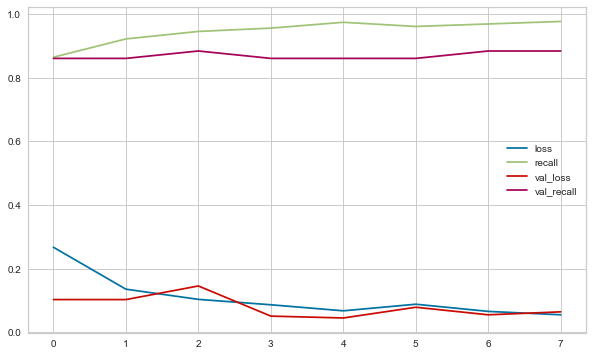

In [223]:
model_w_loss.plot()

In [224]:
y_pred = (model_w.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[26762  1563]
 [    4    43]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     28325
           1       0.03      0.91      0.05        47

    accuracy                           0.94     28372
   macro avg       0.51      0.93      0.51     28372
weighted avg       1.00      0.94      0.97     28372



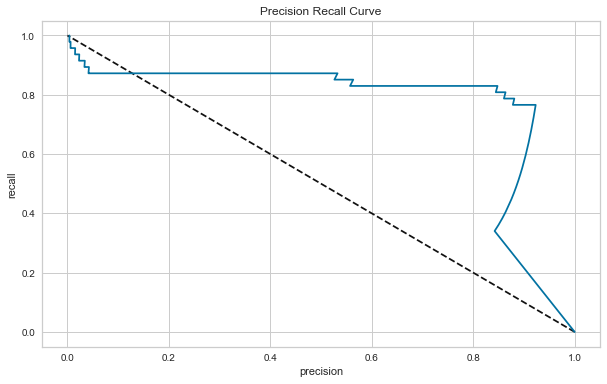

In [225]:
y_pred_proba = model_w.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision Recall Curve')
plt.show();

In [226]:
average_precision_score(y_test, y_pred_proba)

0.7484132881250333

Classweight2

In [227]:
class_weights2 = {0:0.6, 1:4}

In [228]:
model_w2 = Sequential()

model_w2.add(Dense(128, activation = "relu", input_dim = X_train.shape[1])) 
model_w2.add(Dense(64, activation = "relu"))
model_w2.add(Dropout(0.25))
model_w2.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.001)
model_w2.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [229]:
model_w2.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=50,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights2)

Epoch 1/50
1796/1796 [==============================] - 8s 4ms/step - loss: 0.0134 - recall: 0.7520 - val_loss: 0.0047 - val_recall: 0.8372
Epoch 2/50
1796/1796 [==============================] - 7s 4ms/step - loss: 0.0073 - recall: 0.8172 - val_loss: 0.0053 - val_recall: 0.8372
Epoch 3/50
1796/1796 [==============================] - 6s 3ms/step - loss: 0.0064 - recall: 0.8251 - val_loss: 0.0062 - val_recall: 0.8372
Epoch 4/50
1796/1796 [==============================] - 6s 3ms/step - loss: 0.0054 - recall: 0.8433 - val_loss: 0.0039 - val_recall: 0.8372
Epoch 5/50
1796/1796 [==============================] - 7s 4ms/step - loss: 0.0051 - recall: 0.8590 - val_loss: 0.0043 - val_recall: 0.8372
Epoch 6/50
1796/1796 [==============================] - 6s 4ms/step - loss: 0.0048 - recall: 0.8668 - val_loss: 0.0075 - val_recall: 0.8372
Epoch 6: early stopping


In [230]:
model_w2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 128)               3840      
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_23 (Dense)            (None, 1)                 65        
                                                                 
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
_________________________________________________________________


In [231]:
model_w2_loss = pd.DataFrame(model_w2.history.history)
model_w2_loss.head()

,loss,recall,val_loss,val_recall
0,0.013,0.752,0.005,0.837
1,0.007,0.817,0.005,0.837
2,0.006,0.825,0.006,0.837
3,0.005,0.843,0.004,0.837
4,0.005,0.859,0.004,0.837


<AxesSubplot:>

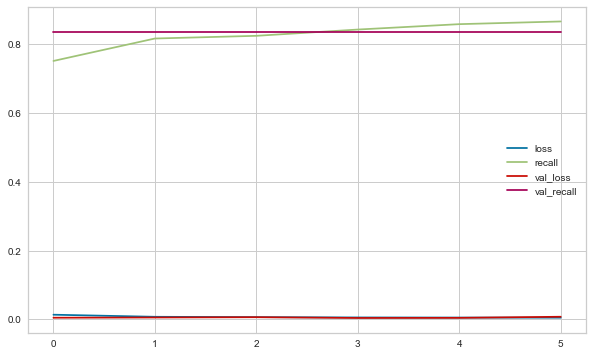

In [232]:
model_w2_loss.plot()

In [233]:
y_pred = (model_w2.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[28317     8]
 [    7    40]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28325
           1       0.83      0.85      0.84        47

    accuracy                           1.00     28372
   macro avg       0.92      0.93      0.92     28372
weighted avg       1.00      1.00      1.00     28372



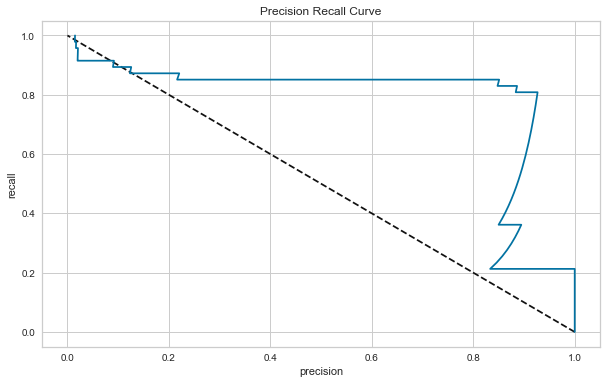

In [234]:
y_pred_proba = model_w2.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision Recall Curve')
plt.show();

In [235]:
average_precision_score(y_test, y_pred_proba)

0.7924242261586628

Grid Search

In [236]:
# def build_classifier(optimizer,learn_rate):
#     classifier = Sequential()
#     classifier.add(Dense(units=16, activation='relu'))
#     classifier.add(Dense(units=8, activation='relu'))
#     classifier.add(Dense(units=1, activation='sigmoid'))
#     classifier.compile(optimizer=optimizer(learn_rate),
#                        loss='binary_crossentropy',
#                        metrics=['Recall'])
#     return classifier

In [237]:
# early_stop = EarlyStopping(monitor = "val_recall", verbose = 1, mode="max", patience = 5, restore_best_weights = True)
# class_weights2 = {0:0.6, 1:4}

In [238]:
# tf.random.set_seed(seed)

# classifier = KerasClassifier(build_fn=build_classifier, epochs=50)
# parameters = {
#     'batch_size': [128, 256],
#     'optimizer': [Adam, RMSprop, Nadam, Adadelta, SGD],
#     'learn_rate': [0.001, 0.003, 0.005]
# }
# grid_model = GridSearchCV(estimator=classifier,
#                           param_grid=parameters,
#                           scoring='recall',
#                           cv=5,
#                           n_jobs=-1,
#                           verbose=0).fit(X_train,
#                                          y_train,callbacks=[early_stop],
#                                          class_weight=class_weights2)

Final DL model

In [239]:
early_stop = EarlyStopping(monitor = "val_recall", verbose = 1, mode="max", patience = 5, restore_best_weights = True)

In [240]:
class_weights2 = {0:0.6, 1:4}

In [241]:
final_DL_model = Sequential()

final_DL_model.add(Dense(128, activation = "relu", input_dim = X_train.shape[1])) 
final_DL_model.add(Dense(64, activation = "relu"))
final_DL_model.add(Dropout(0.20))
final_DL_model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.001)
final_DL_model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [242]:
final_DL_model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=50,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights2)

Epoch 1/50
1796/1796 [==============================] - 7s 4ms/step - loss: 0.0129 - recall: 0.7572 - val_loss: 0.0045 - val_recall: 0.8372
Epoch 2/50
1796/1796 [==============================] - 6s 4ms/step - loss: 0.0073 - recall: 0.8068 - val_loss: 0.0057 - val_recall: 0.8372
Epoch 3/50
1796/1796 [==============================] - 6s 4ms/step - loss: 0.0063 - recall: 0.8329 - val_loss: 0.0068 - val_recall: 0.8372
Epoch 4/50
1796/1796 [==============================] - 6s 4ms/step - loss: 0.0055 - recall: 0.8407 - val_loss: 0.0041 - val_recall: 0.8372
Epoch 5/50
1796/1796 [==============================] - 6s 3ms/step - loss: 0.0050 - recall: 0.8538 - val_loss: 0.0039 - val_recall: 0.8140
Epoch 6/50
1796/1796 [==============================] - 6s 4ms/step - loss: 0.0047 - recall: 0.8642 - val_loss: 0.0080 - val_recall: 0.8372
Epoch 6: early stopping


Saving


In [243]:
pickle.dump(final_DL_model, open("final_DL_model.pkl", 'wb'))

INFO:tensorflow:Assets written to: ram://cbf10e4d-f36e-4f35-82ed-5985909d564d/assets


INFO:tensorflow:Assets written to: ram://cbf10e4d-f36e-4f35-82ed-5985909d564d/assets


In [244]:
final_DL_model.save('dl_model_fraud.h5')

## 4. Model Deployement

### Save and Export the Model as .pkl


In [245]:
pickle.dump(rfs_tuned, open('random_forest_smote(tuned)', 'wb'))
pickle.dump(log_final_model, open("final_log_model.pkl", 'wb'))
pickle.dump(final_DL_model, open("final_DL_model.pkl", 'wb'))

INFO:tensorflow:Assets written to: ram://70b202fd-391e-442c-88a1-bcd5a0c71615/assets


INFO:tensorflow:Assets written to: ram://70b202fd-391e-442c-88a1-bcd5a0c71615/assets


### Save and Export Variables as .pkl